# Initialize

In [1]:
import os
from time import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('..\\')
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
from scresonators.fit_resonator.ana_resonator import ResonatorData
import csv
from datetime import datetime
from scresonators.measurement import vna_measurement
from scresonators.measurement import helpers
from scresonators.measurement import vna_scan
%load_ext autoreload
%autoreload 2

helpers.config_figs()

import scresonators.measurement.vna_measurement
from scresonators.measurement.ZNB import ZNB20

#VNA = ZNB20(address='10.108.30.65') # Stanford
VNA = ZNB20(address='192.168.137.84') # SLAC

## Daily measurement settings
warm_att = 0 #dB
cold_att = 50

spar = 's21'
base_path = r'C:/_Data/SMPDs/VNA'

# spar = 's43'
# base_path = r'G:/My Drive/Projects/Materials/Data/250518-ResSilTa3_cooldown2'

# spar = 's43'
# base_path = r'G:/My Drive/Projects/Materials/Data/250605_check_lines/'


if not os.path.exists(base_path):
    os.makedirs(base_path)

In [ ]:
VNA.reset()

# Single power scans

## Single scan

c:\Users\slab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\slab\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Calculated line delay: nan


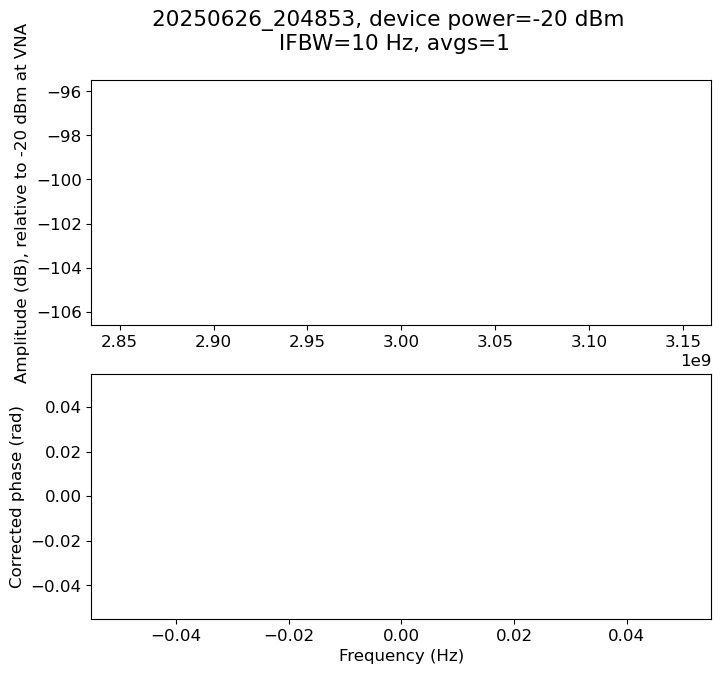

In [262]:
expt_path = base_path
scan_def = {'freq_center':6.5e9, 
            'span':7e9,  
            'bandwidth':10, 
            'power':-20, 
            'npoints':1, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'S42'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's42')


Calculated line delay: 9.782244535403425e-10


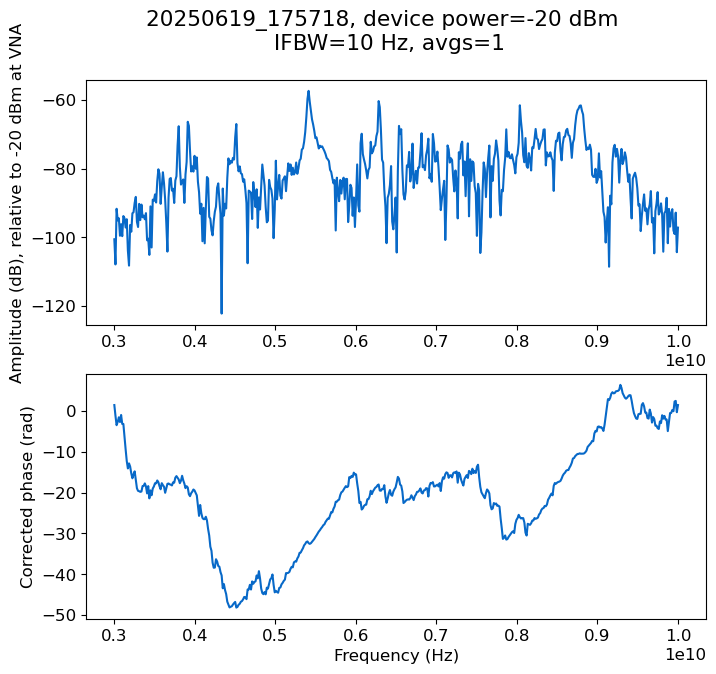

In [260]:
expt_path = base_path
scan_def = {'freq_center':6.5e9, 
            'span':7e9,  
            'bandwidth':10, 
            'power':-20, 
            'npoints':500, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'S23'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's23')

Calculated line delay: 1.4295633528070143e-08


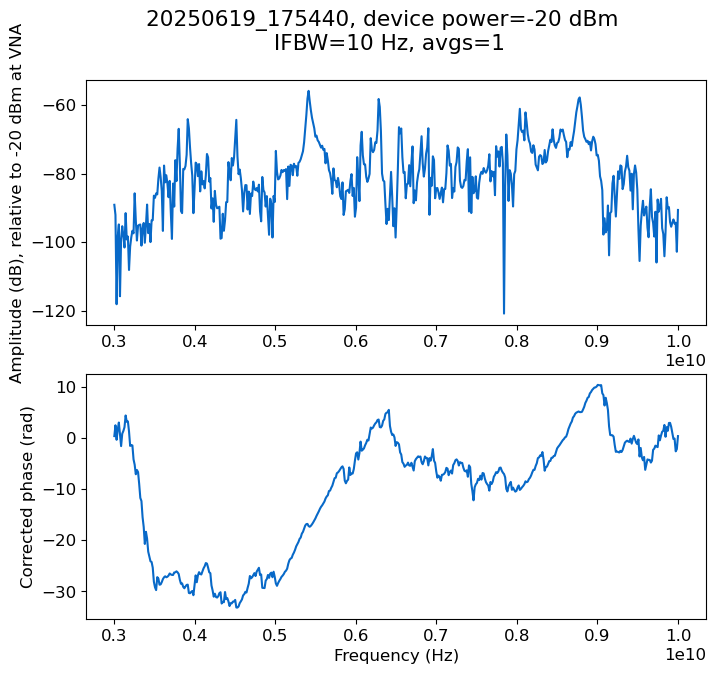

In [259]:
expt_path = base_path
scan_def = {'freq_center':6.5e9, 
            'span':7e9,  
            'bandwidth':10, 
            'power':-20, 
            'npoints':500, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'S41'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's41')

# buffer broad scan

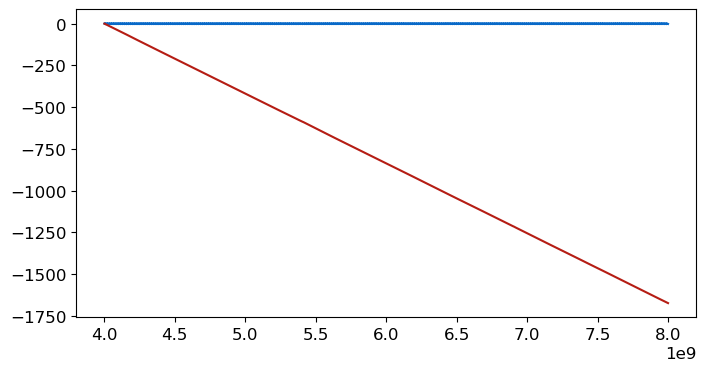

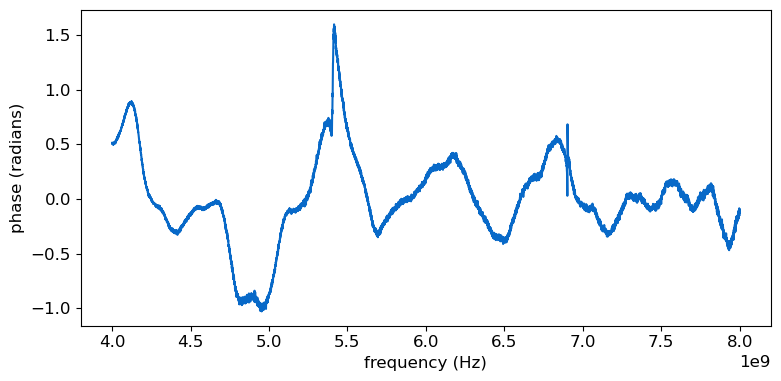

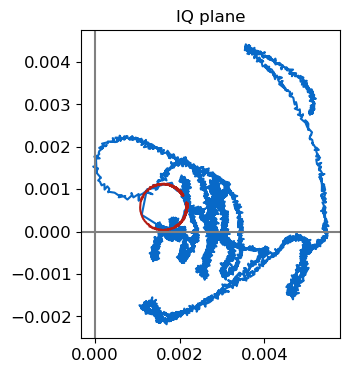

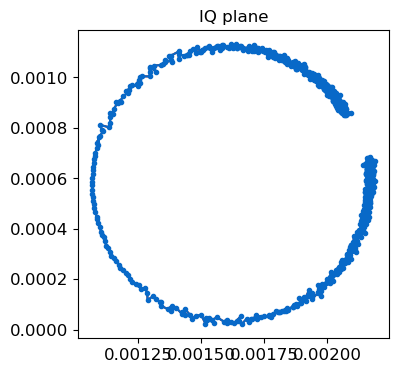

In [254]:
plt.plot(data['freqs'],data['phases'])
phase_data = np.unwrap(data['phases'])
plt.plot(data['freqs'],phase_data)

flat_phase = (data['freqs']>4)&(data['freqs']<8e9)
poly = np.polyfit(data['freqs'][flat_phase],phase_data[flat_phase],1)
phase_data_corrected = phase_data - np.polyval(poly,data['freqs'])

plt.figure()
plt.plot(data['freqs'],phase_data_corrected)
plt.xlabel('frequency (Hz)')
plt.ylabel('phase (radians)')
plt.tight_layout()
plt.savefig(base_path + '/2025_0619 buffer/phase corrected S11.png',dpi=200)

plt.figure()
IQ = 10**(data['amps']/20)*np.exp(1j*phase_data_corrected)
plt.plot(IQ.real,IQ.imag)
resonator = (data['freqs']>6.897e9)&(data['freqs']<6.907e9)
IQ = 10**(data2['amps']/20)*np.exp(1j*(data2['phases']- np.polyval(poly,data2['freqs'])))
plt.plot(IQ.real,IQ.imag)
plt.axhline(0,color='grey')
plt.axvline(0,color='grey')
plt.gca().set_aspect('equal')
plt.title('IQ plane')
plt.savefig(base_path + '/2025_0619 buffer/phase corrected IQ plane.png',dpi=200)

plt.figure()
resonator = (data['freqs']>6.897e9)&(data['freqs']<6.907e9)
plt.plot(IQ.real,IQ.imag,marker='.')
# plt.gca().set_aspect('equal')

plt.plot(IQ.real,IQ.imag,zorder=-100)
plt.gca().set_aspect('equal')
plt.title('IQ plane')
plt.savefig(base_path + '/2025_0619 buffer/buffer resonator IQ plane.png',dpi=200)


Calculated line delay: -4.1828471568833155e-07


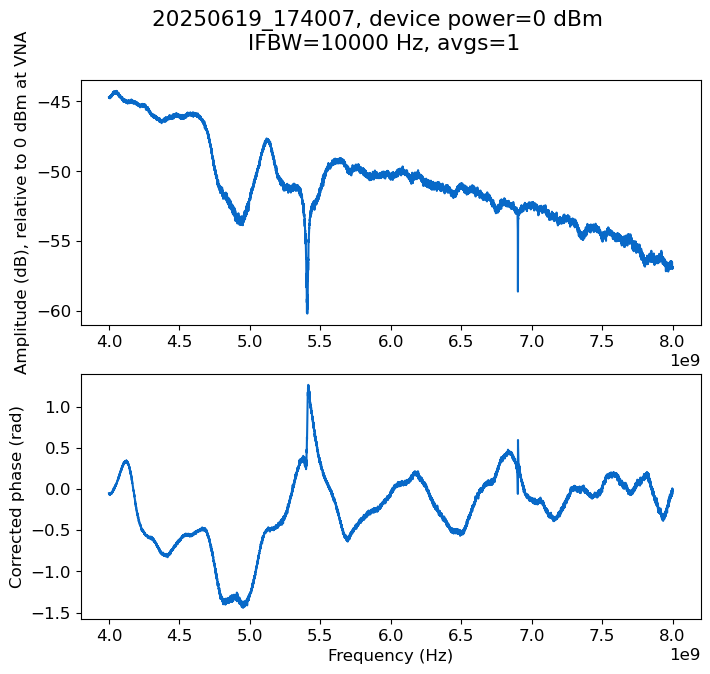

In [251]:
expt_path = base_path
scan_def = {'freq_center':6e9, 
            'span':4e9,  
            'bandwidth':10000, 
            'power':-0, 
            'npoints':8000, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'buffer broad'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's21')

# buffer scan

Calculated line delay: -4.09225827344018e-07


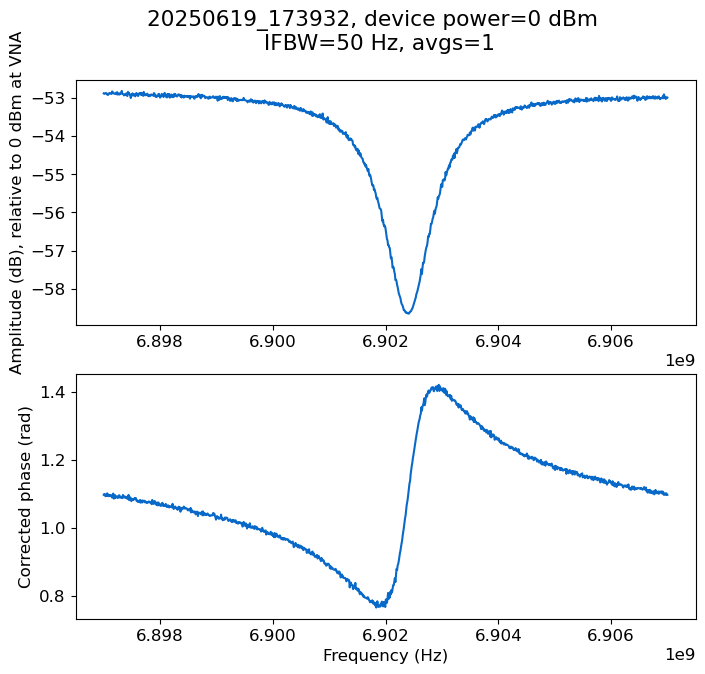

In [250]:
expt_path = base_path
scan_def = {'freq_center':6.902e9, 
            'span':1e7,  
            'bandwidth':50, 
            'power':0, 
            'npoints':1000, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'buffer'
data2=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's21')

# 5.986213520, 6.264641450, 6.418856885, 6.570072000, 6.8067, 7.085925, 7.1553305, 7.3837534, 7.589974, 7.754795

Calculated line delay: -4.0895407048566816e-07


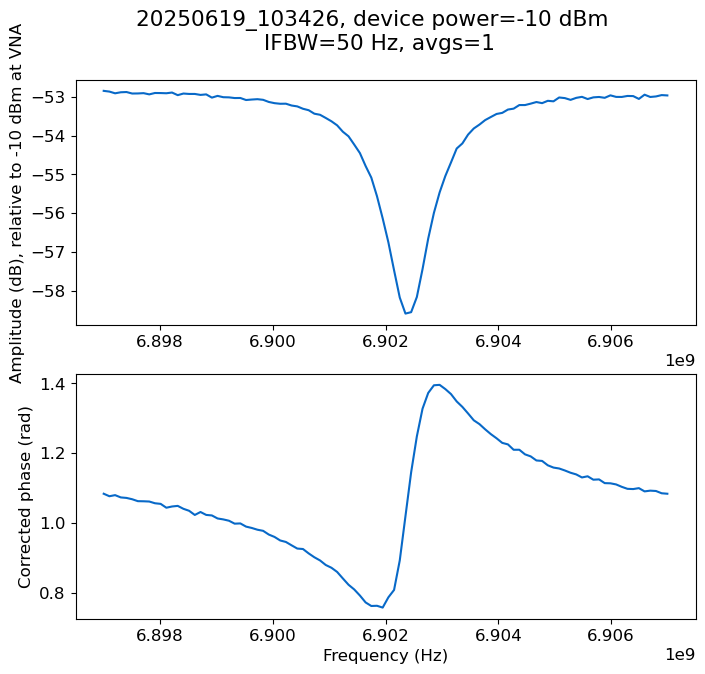

In [114]:
expt_path = base_path
scan_def = {'freq_center':6.902e9, 
            'span':1e7,  
            'bandwidth':50, 
            'power':-10, 
            'npoints':100, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'buffer'
data2=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's21')

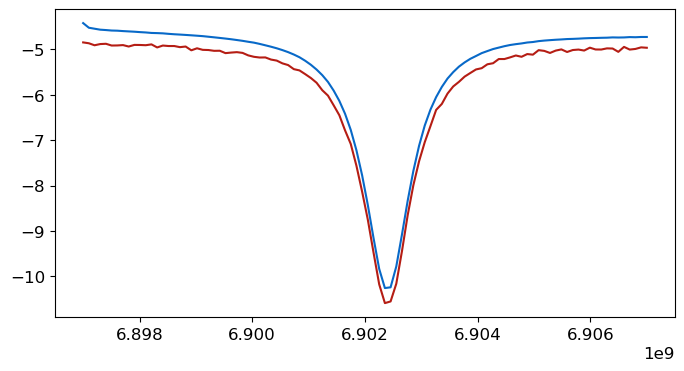

In [129]:
plt.plot(data['freqs'],data['amps'])
plt.plot(data2['freqs'],data2['amps']+48)

# waste scan

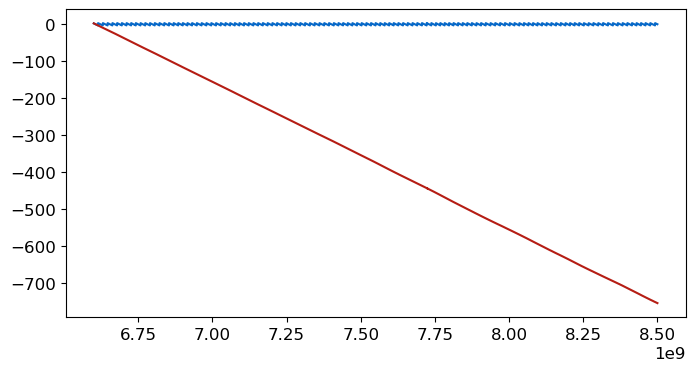

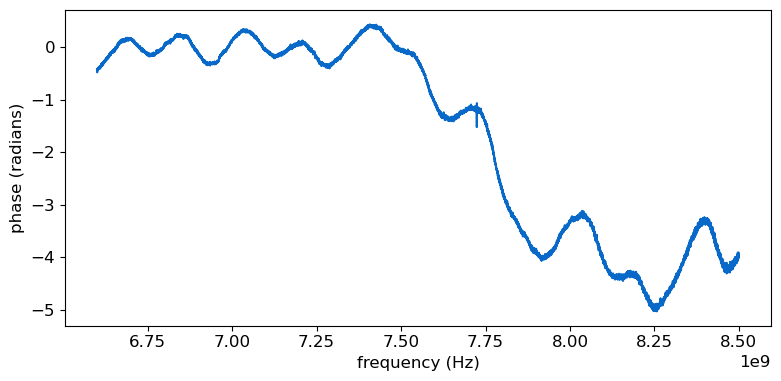

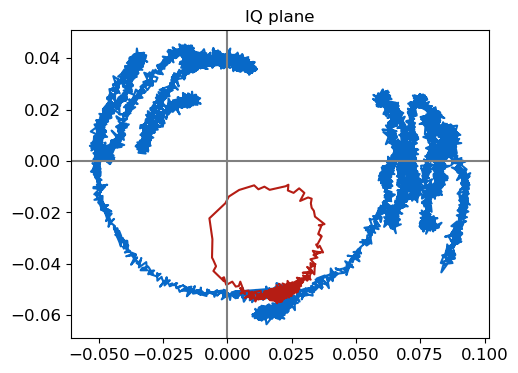

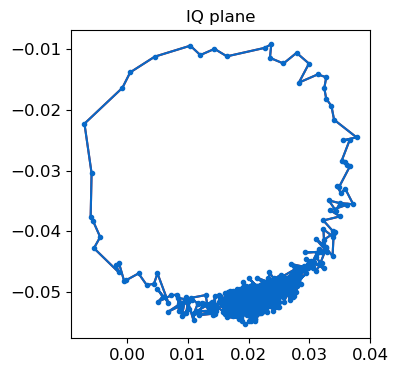

In [241]:
plt.plot(data['freqs'],data['phases'])
phase_data = np.unwrap(data['phases'])
plt.plot(data['freqs'],phase_data)

flat_phase = (data['freqs']>6.75e9)&(data['freqs']<7.25e9)
poly = np.polyfit(data['freqs'][flat_phase],phase_data[flat_phase],1)
phase_data_corrected = phase_data - np.polyval(poly,data['freqs'])

plt.figure()
plt.plot(data['freqs'],phase_data_corrected)
plt.xlabel('frequency (Hz)')
plt.ylabel('phase (radians)')
plt.tight_layout()
plt.savefig(base_path + '/2025_0619 waste/low power/phase corrected purcell.png',dpi=200)

plt.figure()
IQ = 10**(data['amps']/20)*np.exp(1j*phase_data_corrected)
plt.plot(IQ.real,IQ.imag)
resonator = (data['freqs']>7.719e9)&(data['freqs']<7.729e9)
IQ = 10**(data2['amps']/20)*np.exp(1j*(data2['phases']- np.polyval(poly,data2['freqs'])))
plt.plot(IQ.real,IQ.imag)
plt.axhline(0,color='grey')
plt.axvline(0,color='grey')
plt.gca().set_aspect('equal')
plt.title('IQ plane')
plt.savefig(base_path + '/2025_0619 waste/low power/purcell IQ plane.png',dpi=200)

plt.figure()
resonator = (data['freqs']>7.719e9)&(data['freqs']<7.729e9)
plt.plot(IQ.real,IQ.imag,marker='.')
# plt.gca().set_aspect('equal')

plt.plot(IQ.real,IQ.imag,zorder=-100)
plt.gca().set_aspect('equal')
plt.title('IQ plane')
plt.savefig(base_path + '/2025_0619 waste/low power/waste resonator IQ plane.png',dpi=200)




Calculated line delay: -3.980531537805806e-07


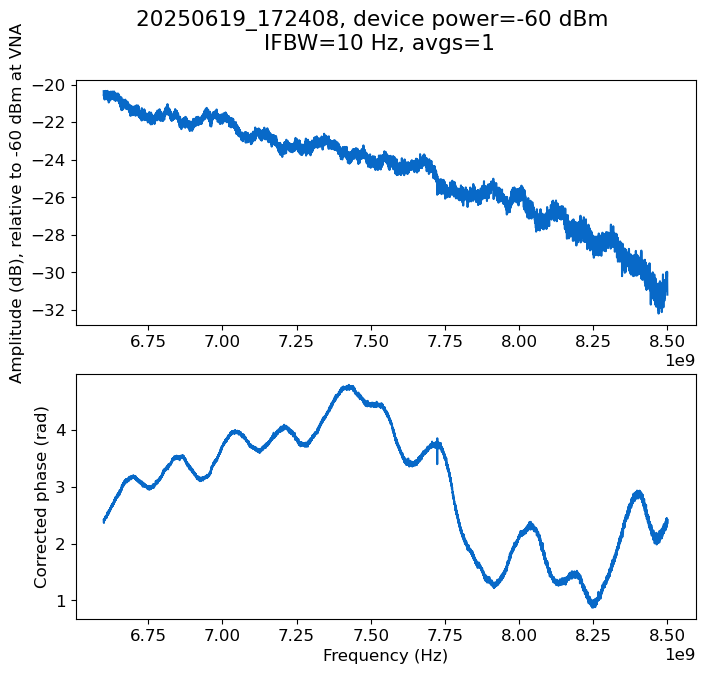

In [235]:
expt_path = base_path
scan_def = {'freq_center':7.55e9, 
            'span':1.9e9,  
            'bandwidth':10, 
            'power':-60, 
            'npoints':8000, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'waste_purcell'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's43')


Calculated line delay: -3.7483372747773653e-07


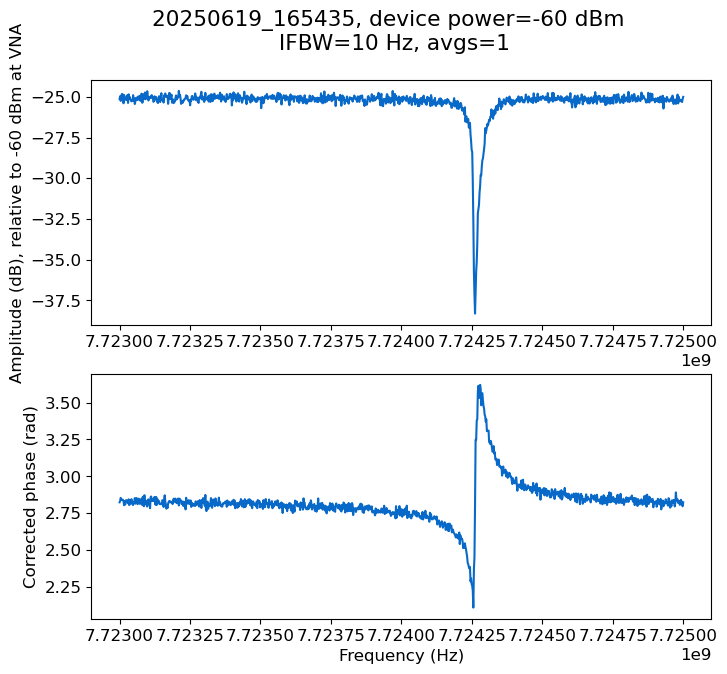

In [233]:
expt_path = base_path
scan_def = {'freq_center':7.72425e9, 
            'span':0.5e6,  
            'bandwidth':10, 
            'power':-60, 
            'npoints':1000, 
            'averages':1}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'waste'
data2=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's43')


-60.0
Calculated line delay: -3.6587005147674795e-07


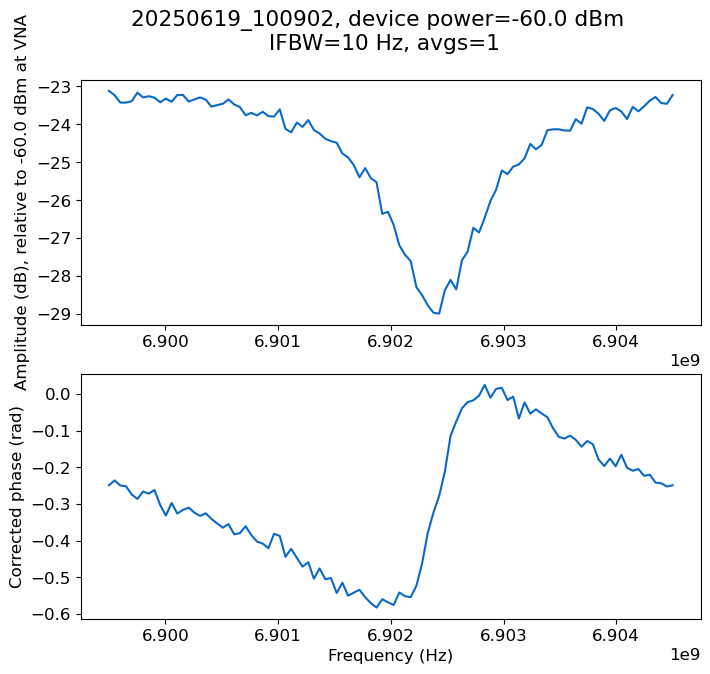

-59.5
Calculated line delay: -3.669391446264224e-07


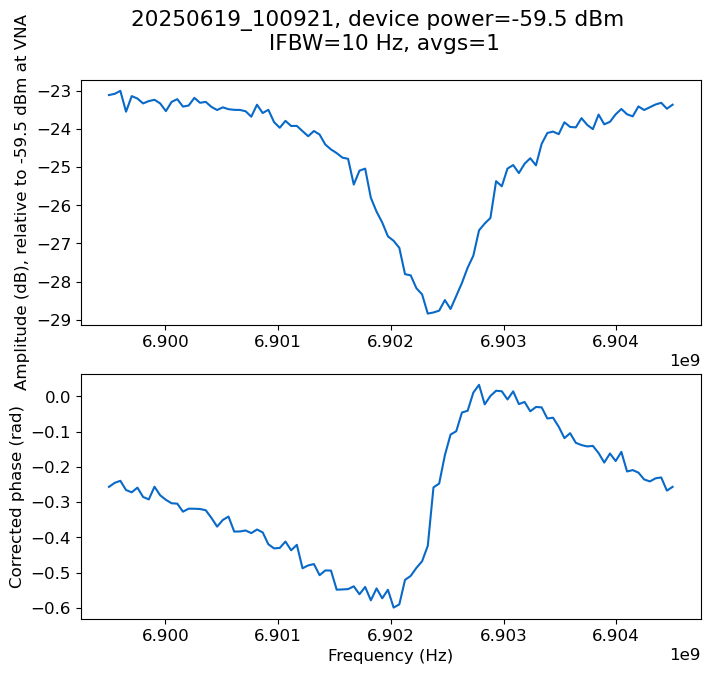

-59.0
Calculated line delay: -3.694845912781622e-07


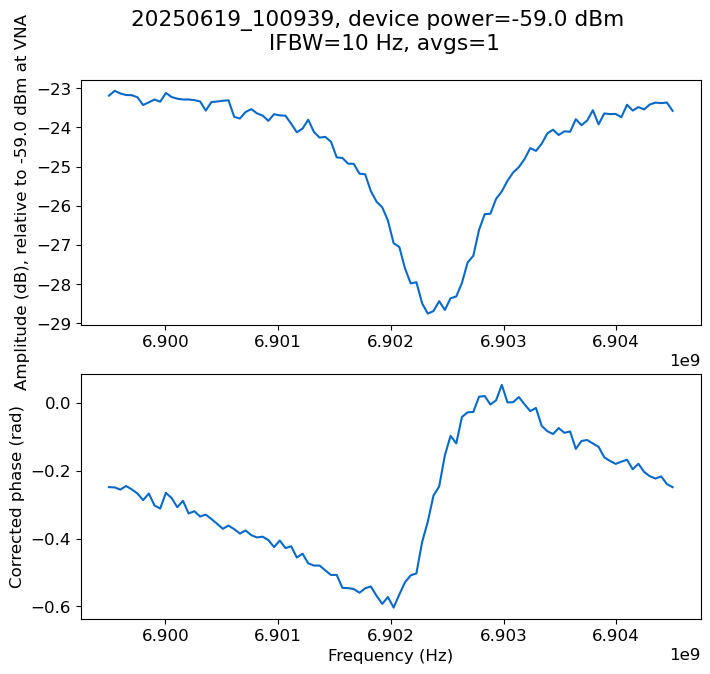

-58.5
Calculated line delay: -3.702146742996135e-07


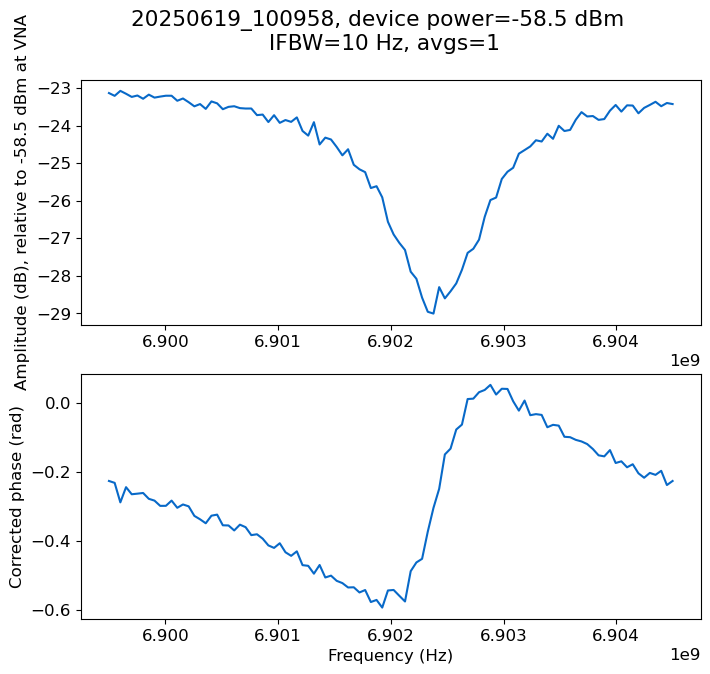

-58.0
Calculated line delay: -3.673445358038707e-07


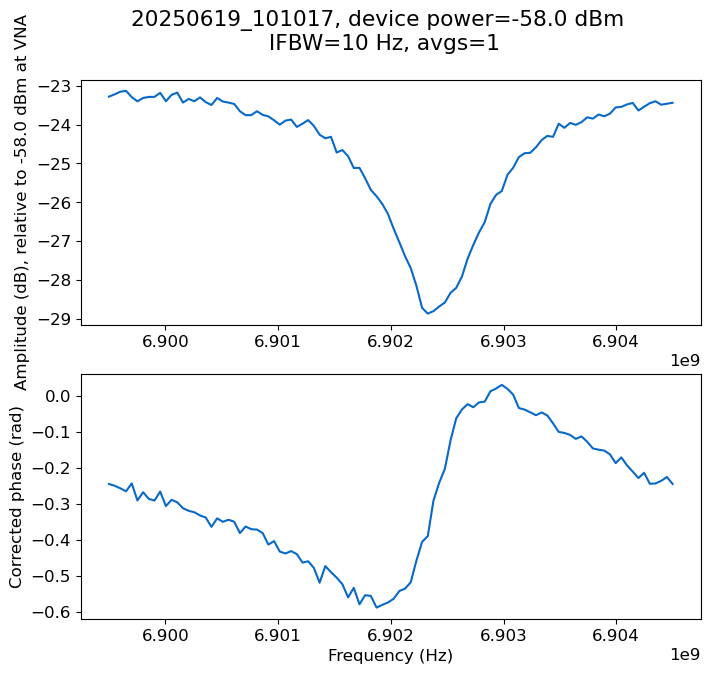

-57.5
Calculated line delay: -3.672839594294203e-07


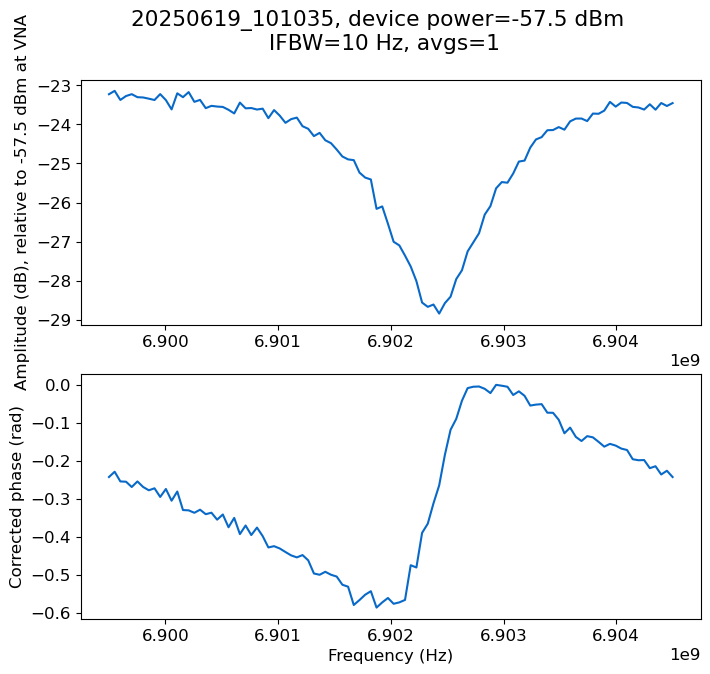

-57.0
Calculated line delay: -3.712483983012751e-07


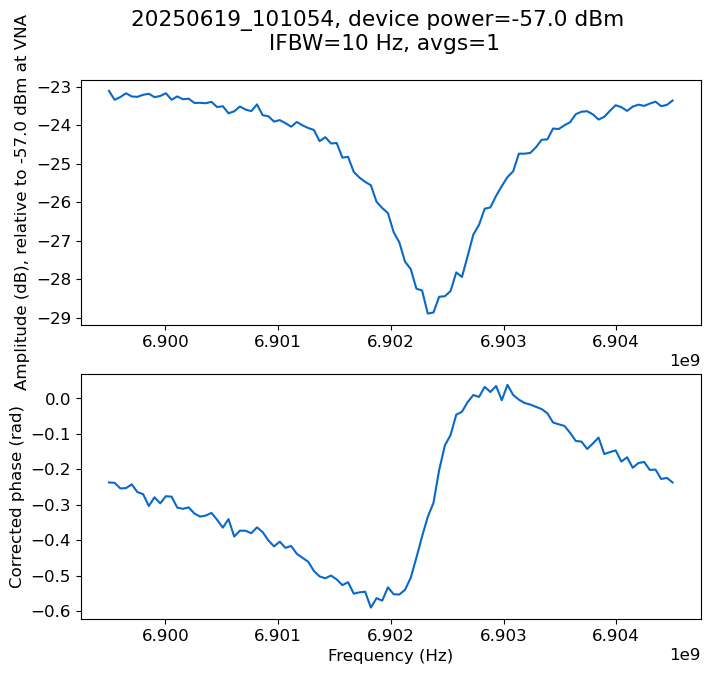

-56.5
Calculated line delay: -3.67958622596817e-07


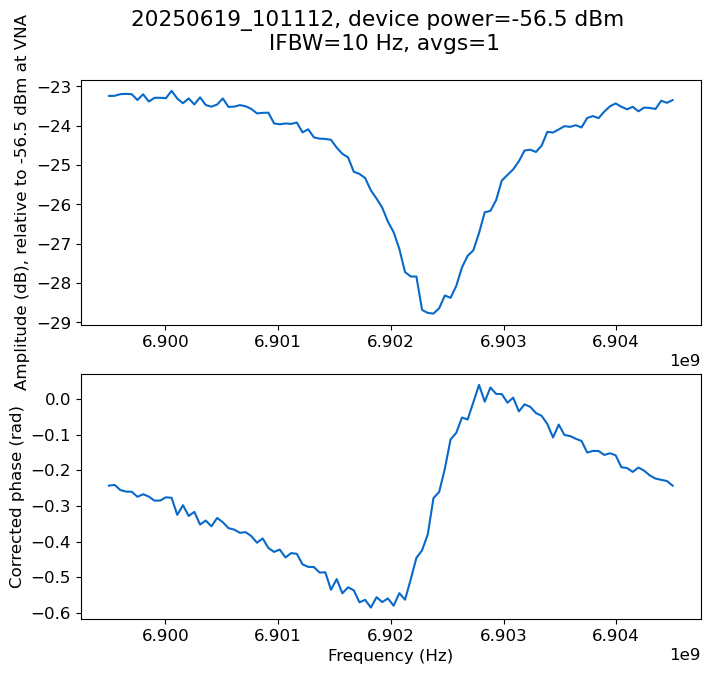

-56.0
Calculated line delay: -3.6684077760954607e-07


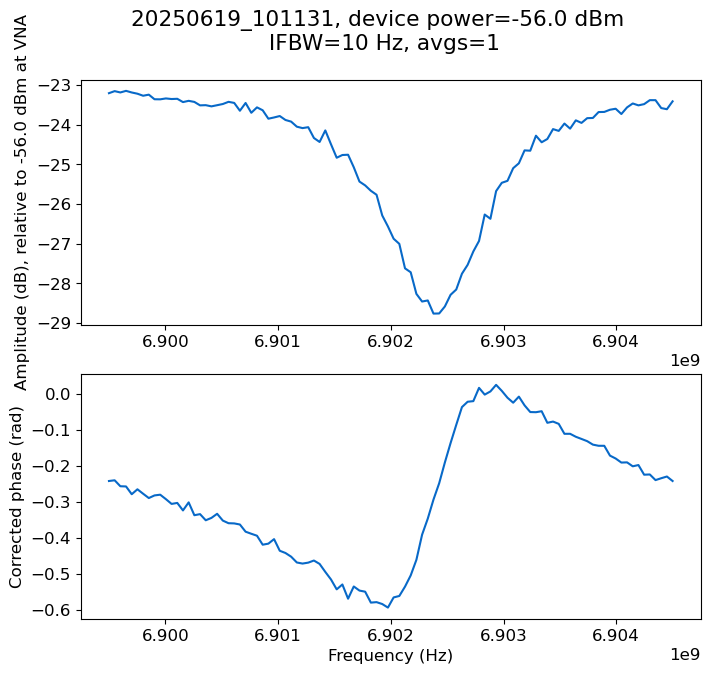

-55.5
Calculated line delay: -3.6579333651887896e-07


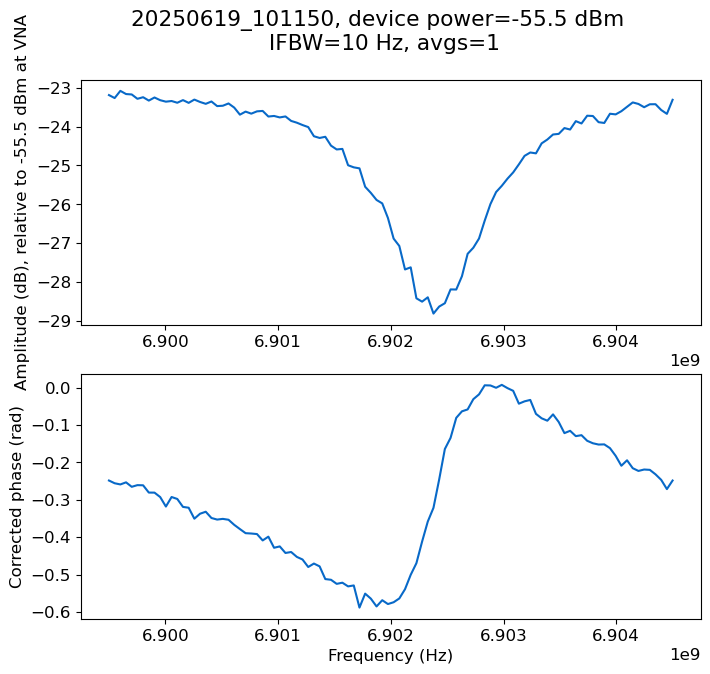

-55.0
Calculated line delay: -3.72370797265507e-07


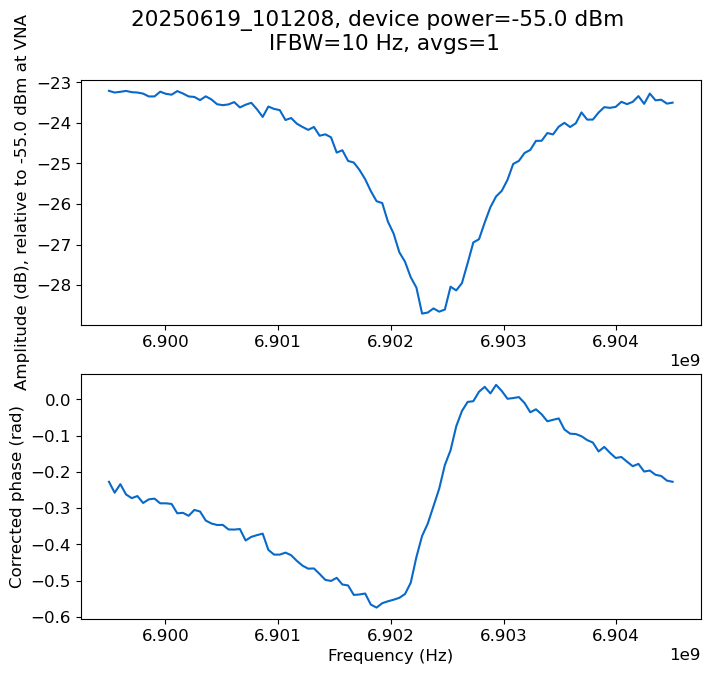

-54.5
Calculated line delay: -3.673767536637722e-07


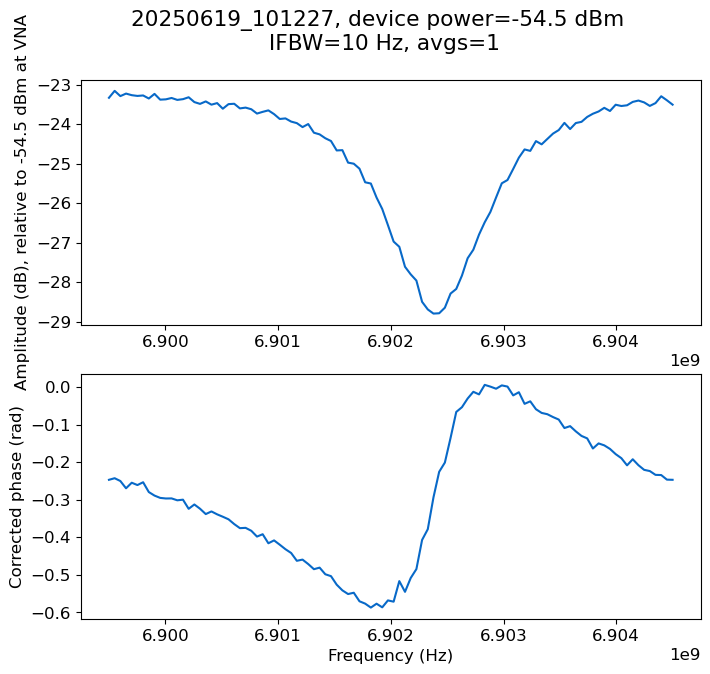

-54.0
Calculated line delay: -3.6763342935832386e-07


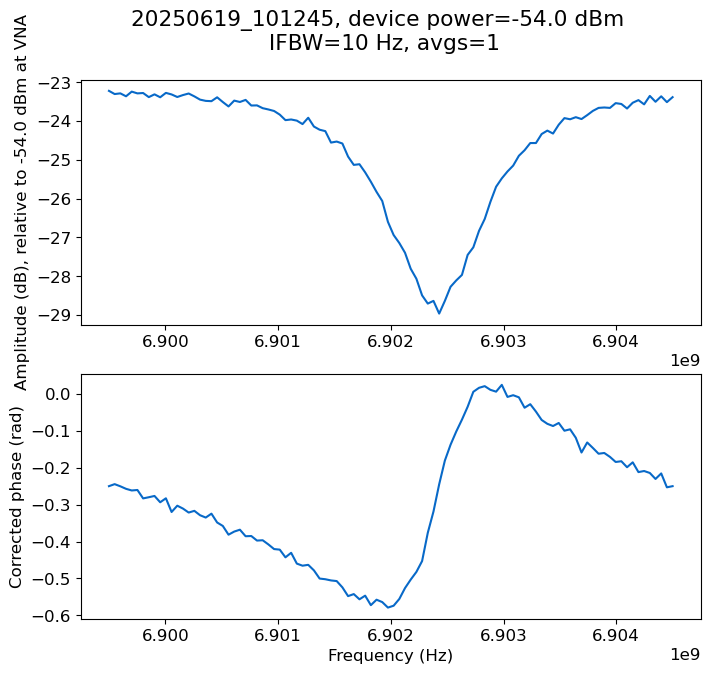

-53.5
Calculated line delay: -3.678754020828411e-07


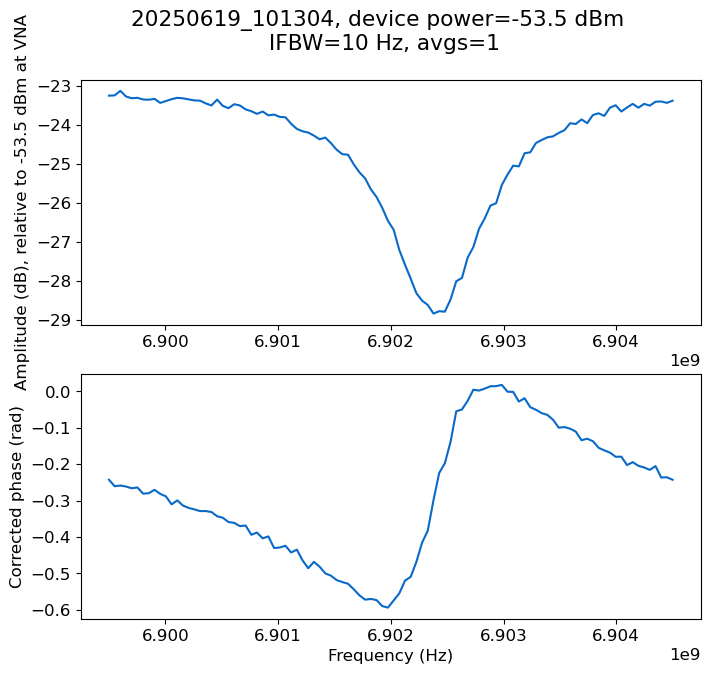

-53.0
Calculated line delay: -3.6905210765417287e-07


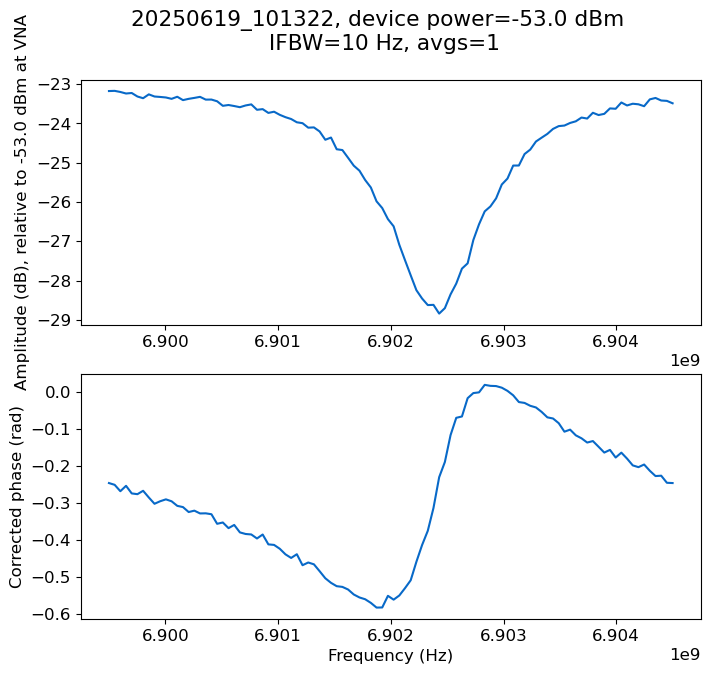

-52.5
Calculated line delay: -3.6703537111553617e-07


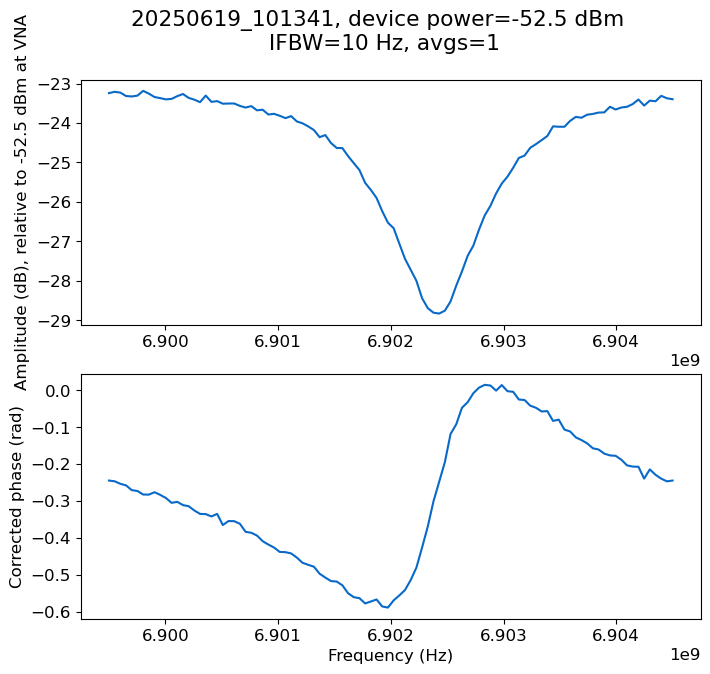

-52.0
Calculated line delay: -3.6326590196465904e-07


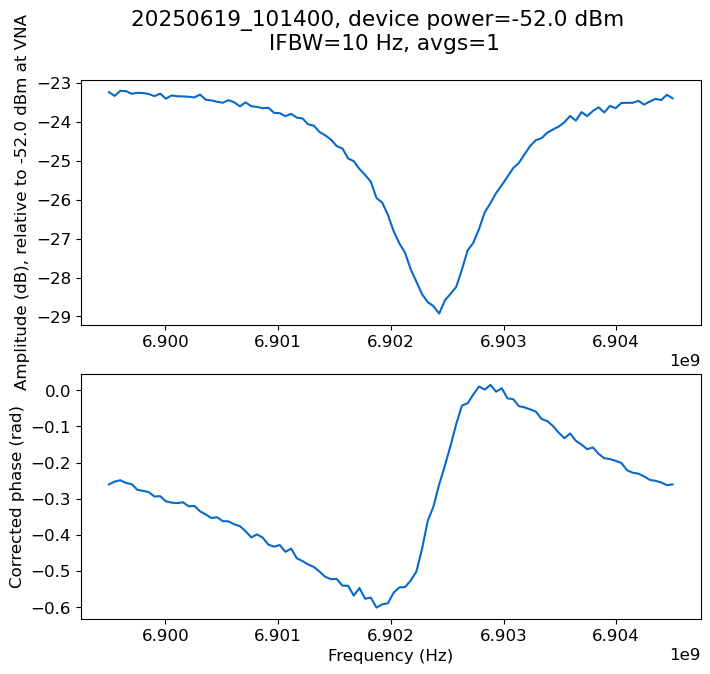

-51.5
Calculated line delay: -3.6731175064157734e-07


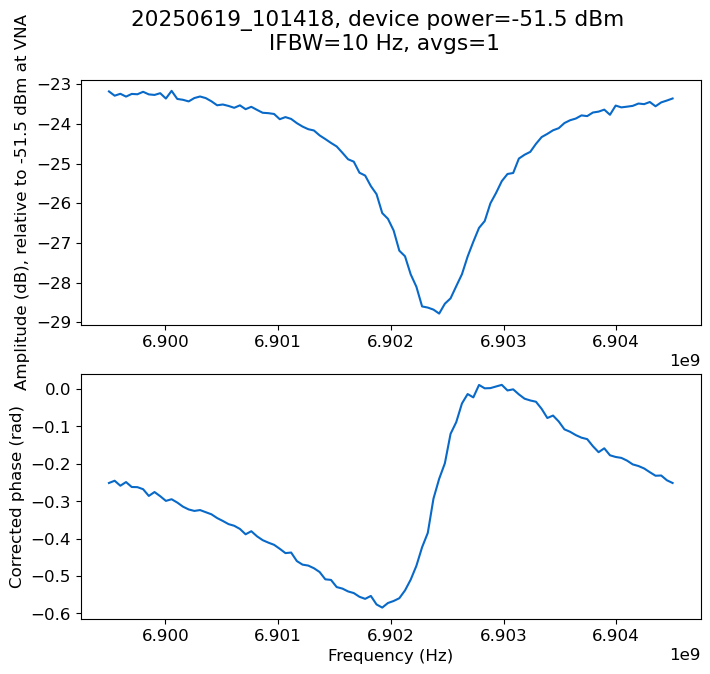

-51.0
Calculated line delay: -3.682711643884013e-07


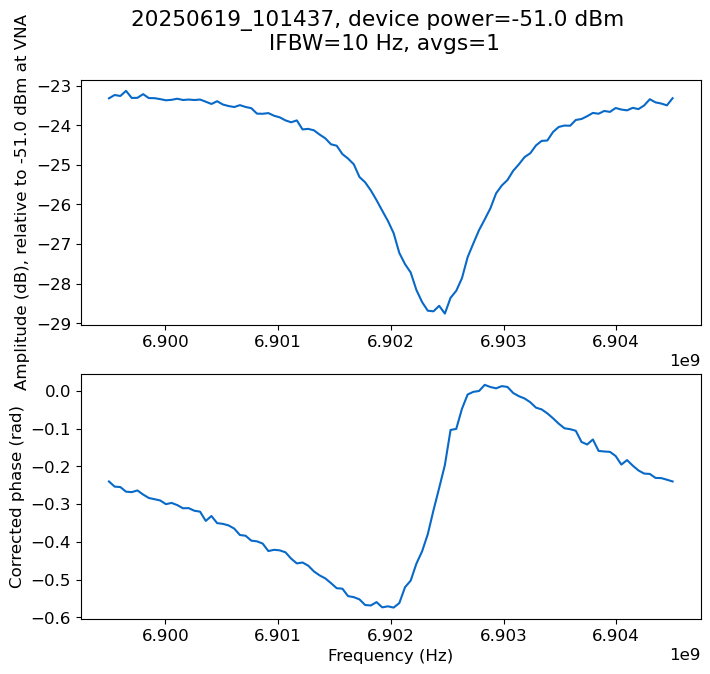

-50.5
Calculated line delay: -3.6952523404351946e-07


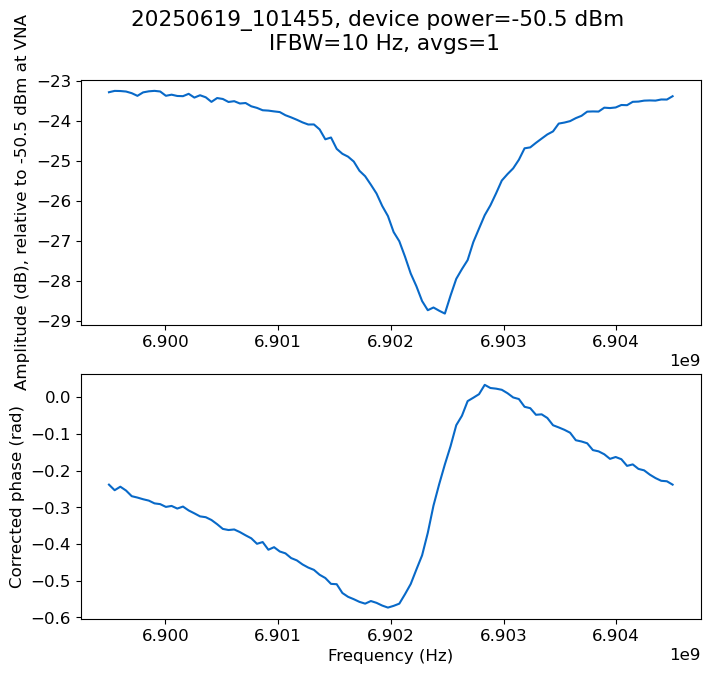

-50.0
Calculated line delay: -3.661304562646789e-07


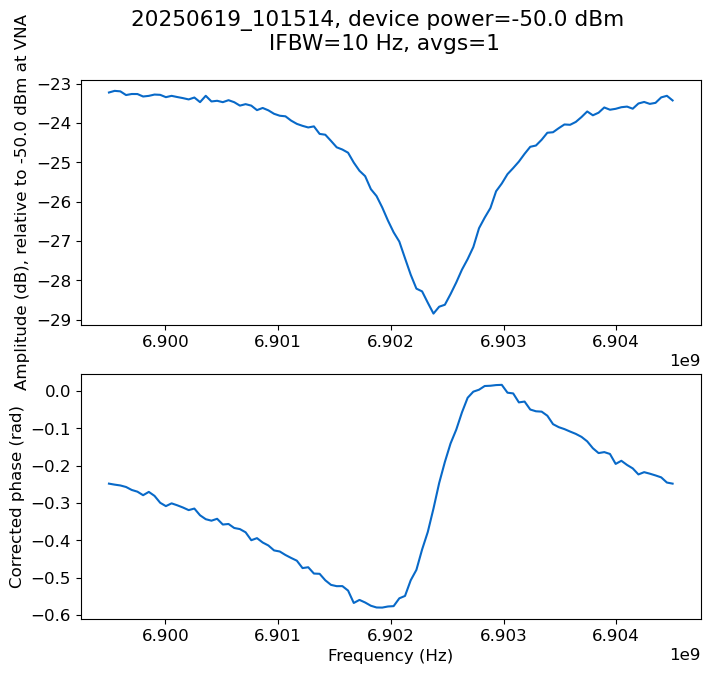

In [103]:
loop_data = []
npoints = 21 
power_vals = np.linspace(-60, -50, npoints)


freq_center = 6.902e9
fpoints=100
span = 5e6
expt_path = base_path
for p in power_vals: 
    print(p)
    scan_def = {'freq_center':freq_center, 
                'span':span,  
                'bandwidth':10, 
                'power':p, 
                'npoints':fpoints, 
                'averages':1}
    #file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    file_name = 'buffer'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, 's21')
    loop_data.append(data)


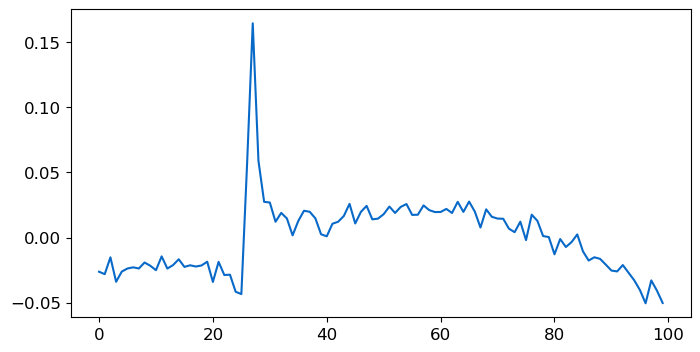

In [49]:
phase_data = np.unwrap(loop_data[0]['phases'])
poly = np.polyfit(loop_data[0]['freqs'],np.unwrap(loop_data[0]['phases']),1)
phase_data - np.polyval(poly,loop_data[0]['freqs'])

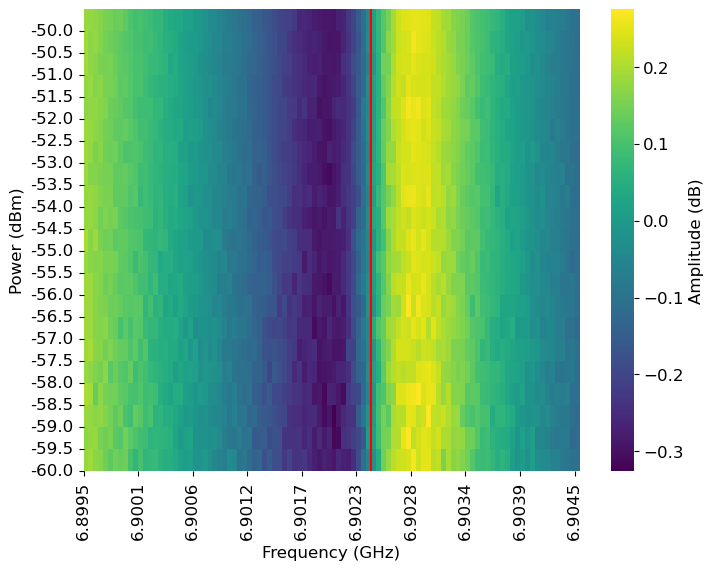

In [109]:
amps_2d = np.array([d['phases'] for d in loop_data])
# print(amps_2d.shape)

amps_2d = []
for d in loop_data:
    phase_data = np.unwrap(d['phases'])
    poly = np.polyfit(d['freqs'],np.unwrap(d['phases']),1)
    phase_data_corrected = phase_data - np.polyval(poly,d['freqs'])
    amps_2d.append(phase_data_corrected)

amps_2d = np.array(amps_2d)


freqs = np.linspace(freq_center-span/2, freq_center+span/2, fpoints)

plt.figure(figsize=(8, 6))

sns.heatmap(amps_2d, xticklabels=np.round(freqs/1e9, 4), yticklabels=np.round(power_vals, 1), cmap='viridis', cbar_kws={'label': 'Amplitude (dB)'})
plt.axvline(58,color='r')
plt.gca().invert_yaxis()
plt.xticks(ticks=np.linspace(0, len(freqs)-1, 10), labels=np.round(np.linspace(freqs[0]/1e9, freqs[-1]/1e9, 10), 4))
power_spacing = 1
plt.yticks(ticks=np.arange(len(power_vals)//power_spacing)*power_spacing, labels=np.round(power_vals[::power_spacing], 1))
plt.xlabel('Frequency (GHz)')
plt.ylabel('Power (dBm)')
plt.show()

In [93]:
waste_loop_data = loop_data

## Check resonances at one power

Calculated line delay: -4.1711520558816326e-07


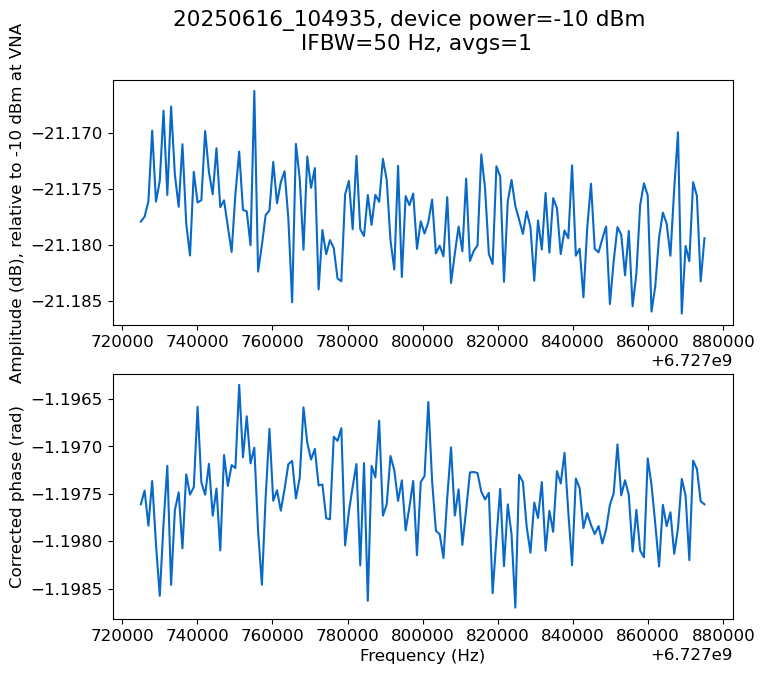

Calculated line delay: -4.1139408808953317e-07


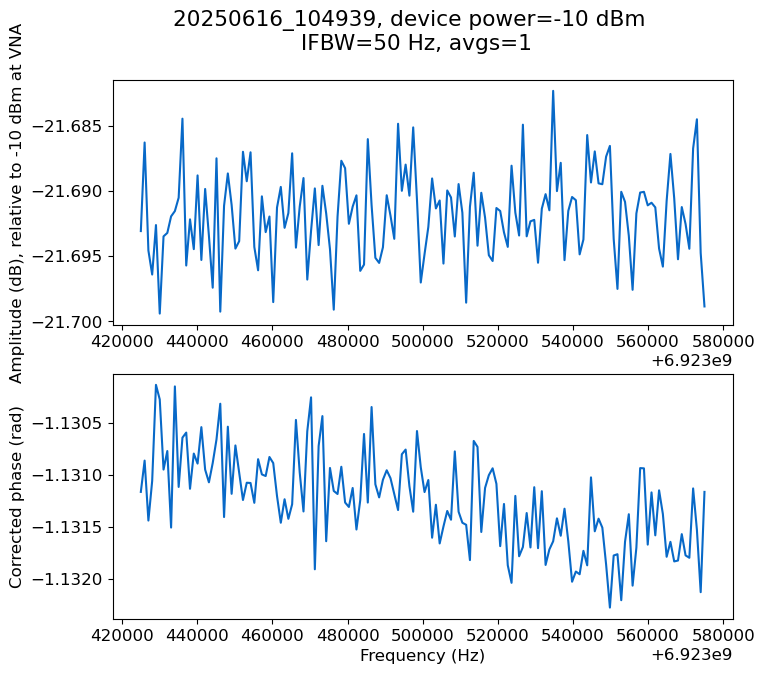

Calculated line delay: -4.1767648774778894e-07


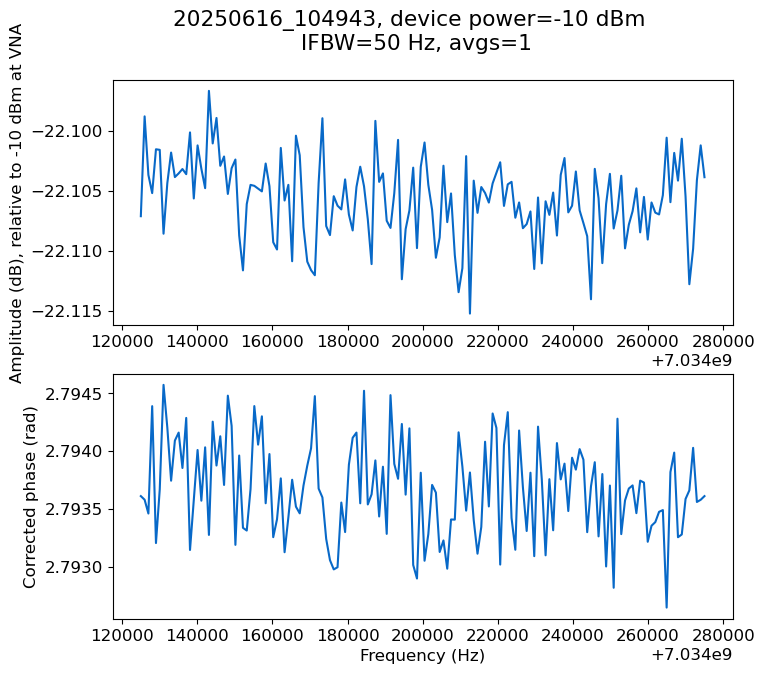

In [89]:
%matplotlib inline
expt_path = base_path
npoints = 150
span=0.15e6
power = -10

freqs = np.array([6.0175e+09, 6.3510e+09, 6.7120e+09, 7.0296e+09, 7.1744e+09, 7.5467e+09])
freqs =np.array([6.7278e+09, 6.9235e+09, 7.0342e+09])
bandwidth=50
avgs=1
for freq_center in freqs:     
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

# Get the phase to correct with 

Calculated line delay: -8.263375470332096e-07


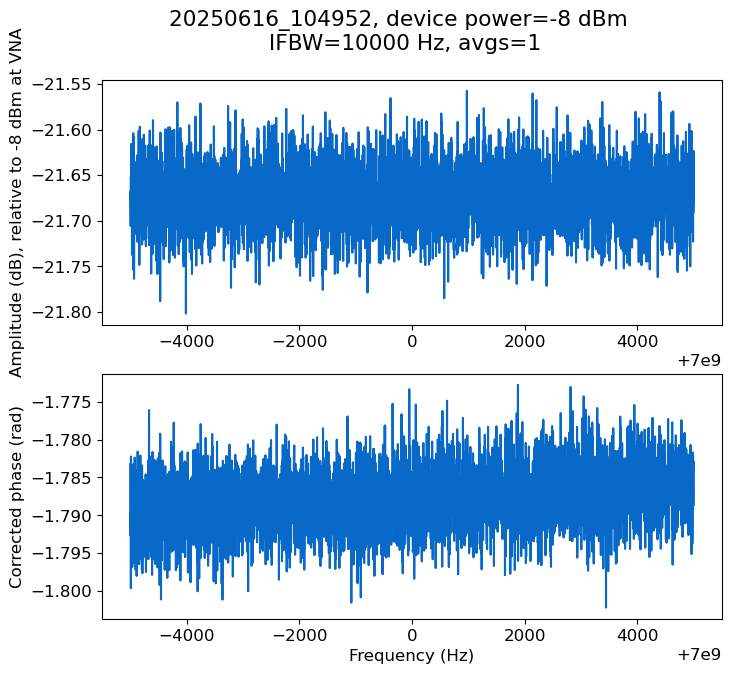

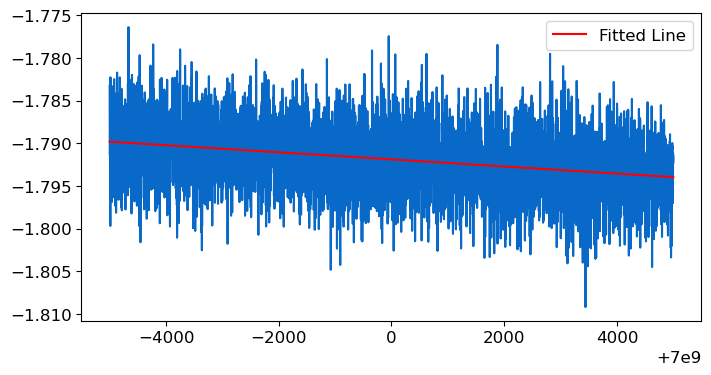

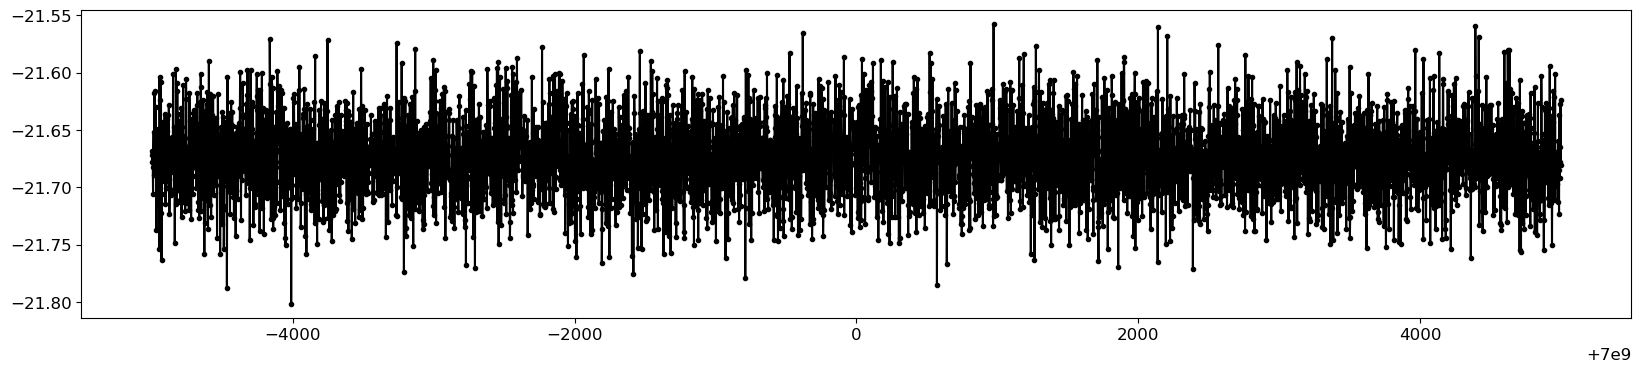

In [90]:
from scipy.stats import linregress

npoints = 5000
span=1e4
power = -8

bandwidth=10000
freq_center = 7e9
avgs=1    
scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
file_name = 'phase_check_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
data=vna_scan.do_vna_scan(VNA, file_name, base_path, scan_def, spar)

plt.figure()
plt.plot(data['freqs'], np.unwrap(data['phases']))

# Fit the data to a line
slope, intercept, r_value, p_value, std_err = linregress(data['freqs'], np.unwrap(data['phases']))

# Plot the fitted line
plt.plot(data['freqs'], slope * data['freqs'] + intercept, label='Fitted Line', color='red')
plt.legend()
plt.show()


plt.figure(figsize=(20, 4))
plt.plot(data['freqs'], data['amps'],'k.-')
#config.update_config(cfg_path, 'readout', qi, 'phase_const', slope)

In [92]:
slope

-4.1545782482711315e-07

# Run all these cells to do power sweep

## Broad frequency scan looking for resonances 

In [93]:
expt_path = base_path
span=40e6
power = 0
avgs = 3
d=[]
bandwidth=5000
freq_min=5.6e9
freq_max = 8.1e9 
nscans = int(np.ceil((freq_max - freq_min)/span))
for i in range(nscans):
    freq_center = freq_min + i*span
    scan_def = {'freq_center':freq_center, 
                'span':span,  
                'bandwidth':bandwidth, 
                'power':power, 
                'npoints':7500, 
                'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    d.append(vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar, plot=False))

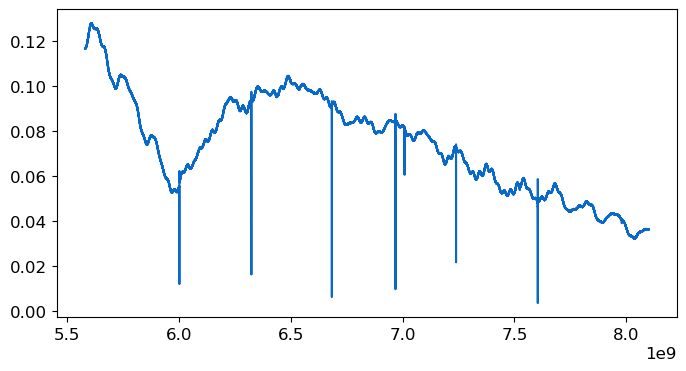

In [94]:
dd = helpers.concat_scans(d)
dd['amps'] = helpers.make_lin(dd['amps'])
plt.figure()
plt.plot(dd['freqs'],dd['amps'])

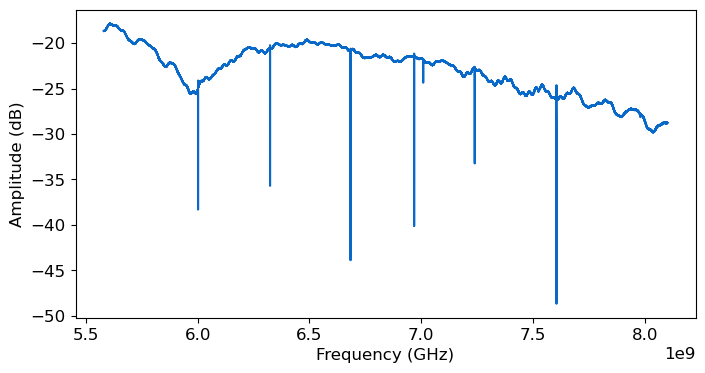

In [95]:
dd_db = helpers.concat_scans(d)
plt.figure()
plt.plot(dd_db['freqs'],dd_db['amps'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude (dB)')
plt.savefig('amp_vs_freq_4.png')

9


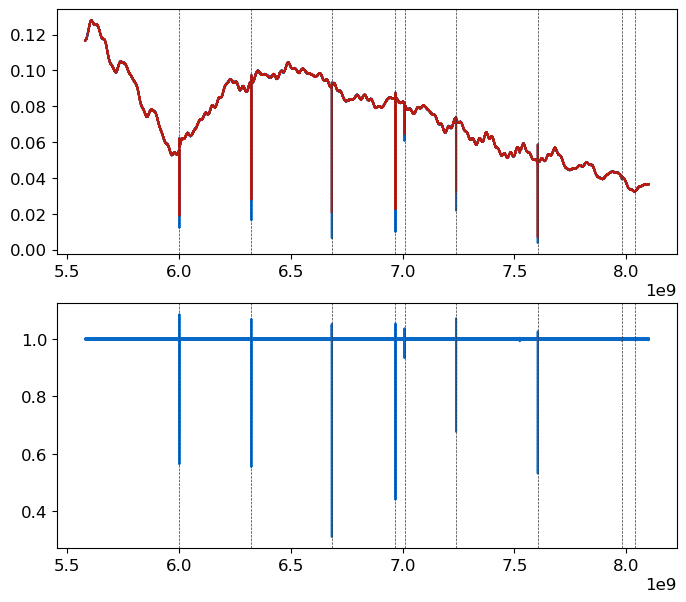

In [99]:
data = helpers.find_peaks(dd, 0.0075)
print(len(data['coarse_peaks']))

In [100]:
res_list = data['coarse_peaks']
#res_list = data['coarse_peaks'][0:6]

In [ ]:

res_list = np.delete(res_list, 2)

In [23]:
res_list = np.append(res_list, 8.018e9)

## Medium width scan checking each resonance 
Saves the minimum value of transmission to res_freqs for narrower scan next. 

Calculated line delay: -4.0326073873260086e-07


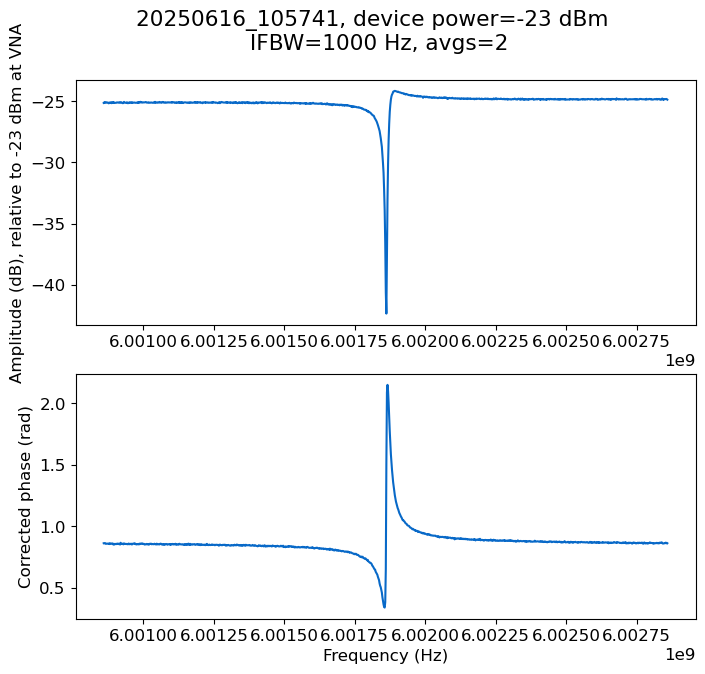

Calculated line delay: -4.0495948441050565e-07


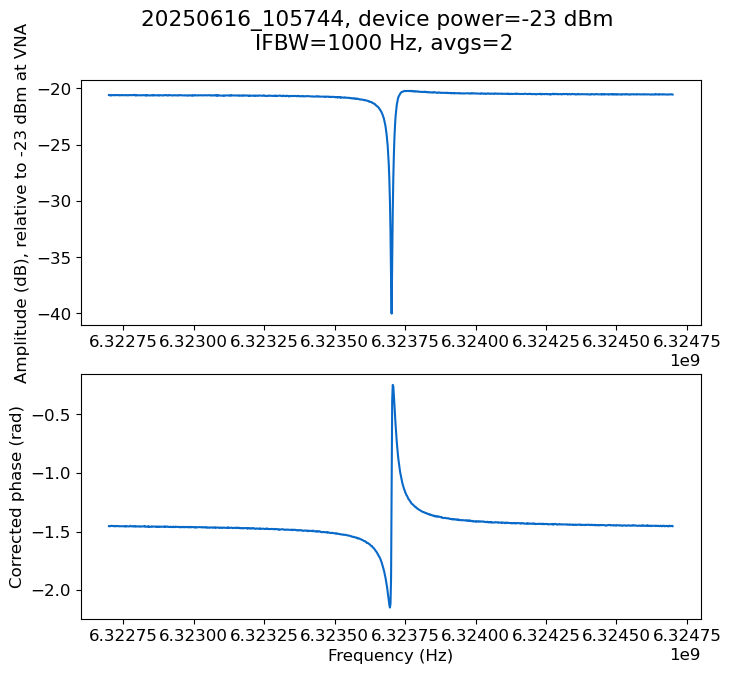

Calculated line delay: -3.978888771462818e-07


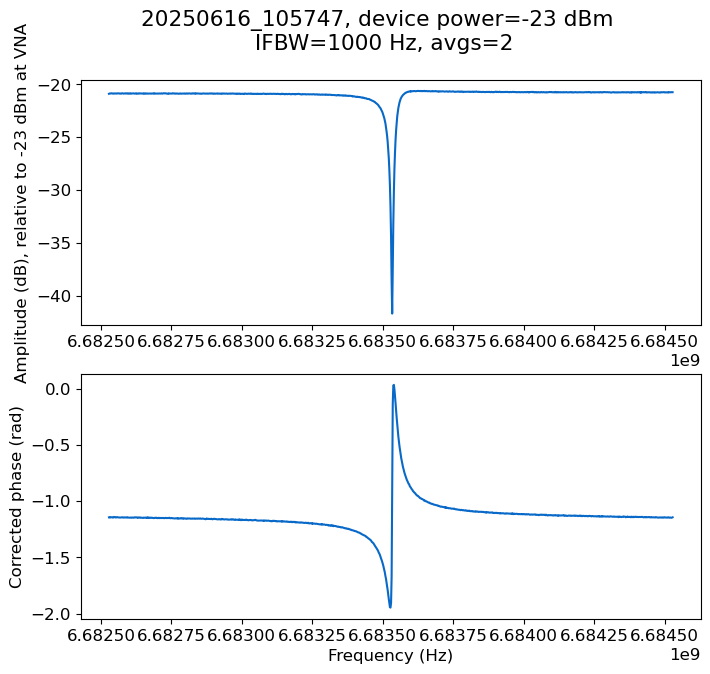

Calculated line delay: -4.051975366415823e-07


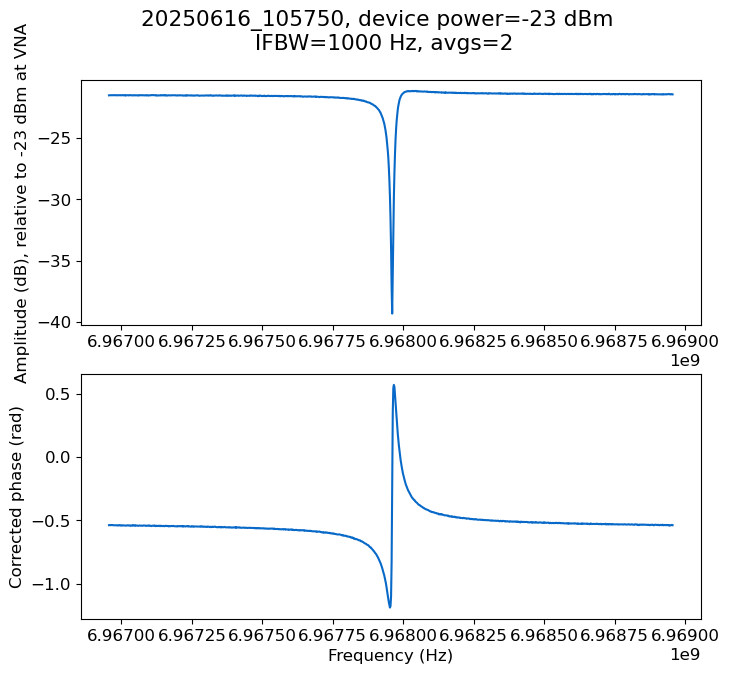

Calculated line delay: -4.1800640985818304e-07


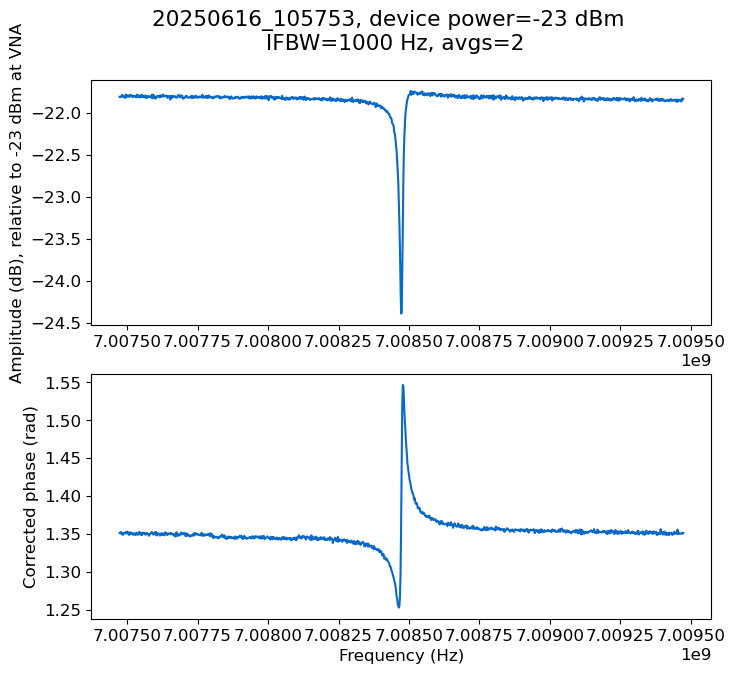

Calculated line delay: -4.126898049291853e-07


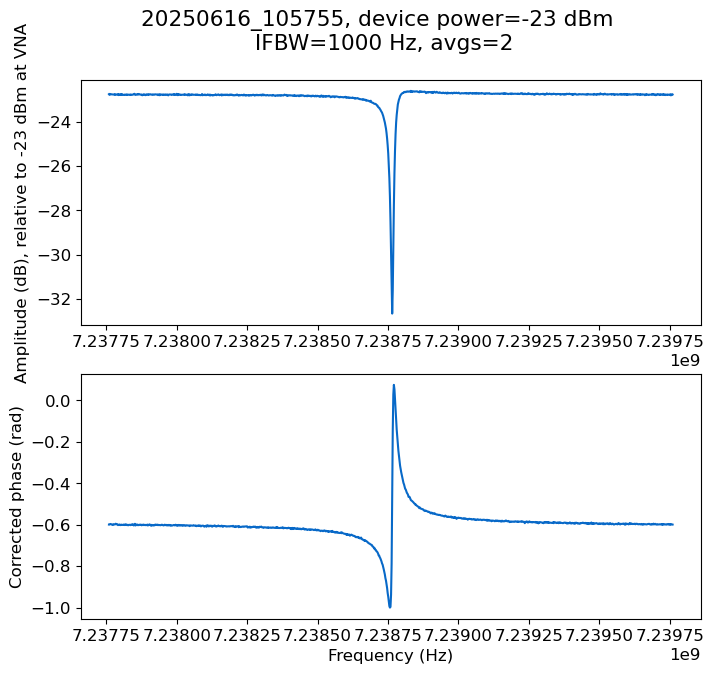

Calculated line delay: -3.8520226230807677e-07


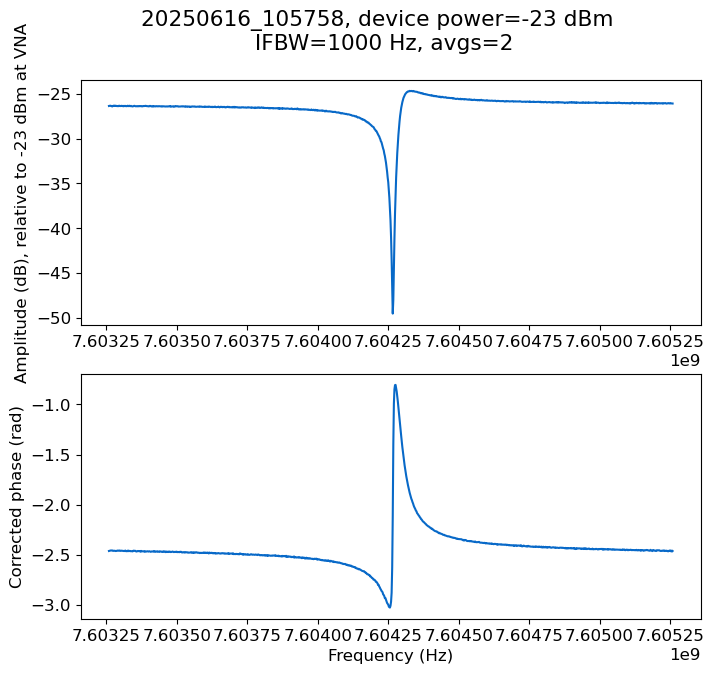

Calculated line delay: -4.178225363120524e-07


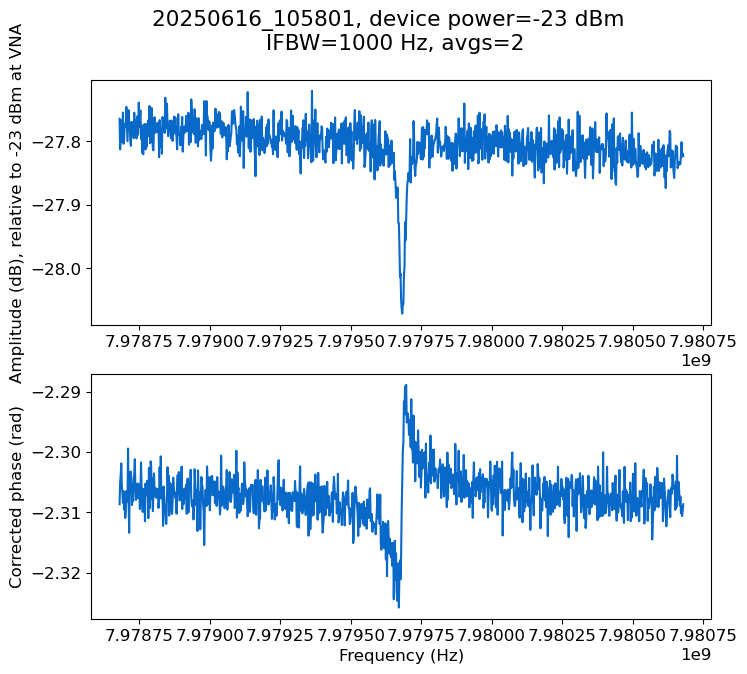

Calculated line delay: -4.1331718176705815e-07


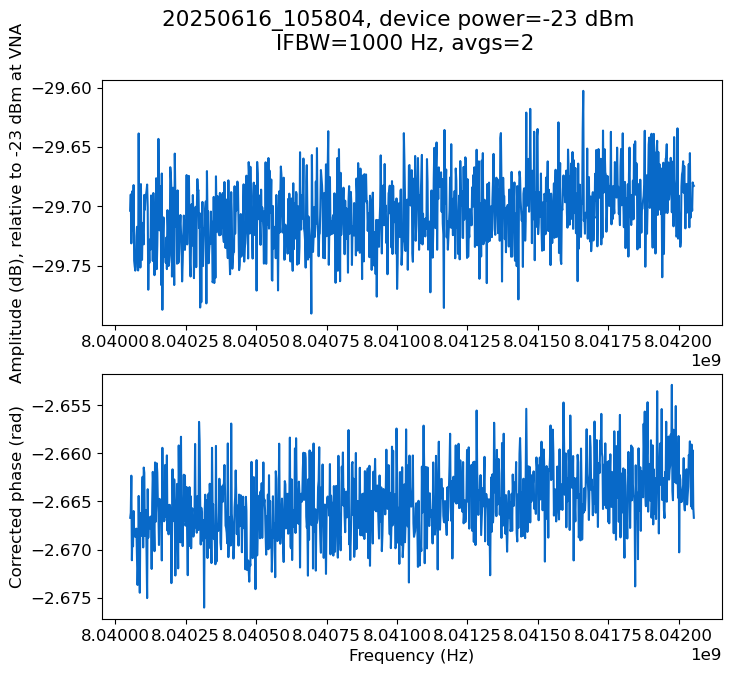

In [101]:
expt_path = base_path
span=2e6
res_freqs =[]
power=-10
temp=0.01


for freq_center in res_list:
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':1000, 'power':-23, 'npoints':1000, 'averages':2}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_' + str(temp) + 'K'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    res_freqs.append(data['freqs'][np.argmin(data['amps'])])

## Narrower scan before power sweep

In [ ]:
freq_list =[]
import copy 
scan_def['span']=1e5
scan_def['power']=-10
for res in res_freqs:
    scan_def['freq_center'] = res
    file_name = 'res_' + str(scan_def['freq_center'])[:7] + '_' + str(power)[1:] + 'dbm'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    freq_list.append(data['freqs'][np.argmin(data['amps'])])
res_freqs=copy.deepcopy(freq_list)

In [103]:
res_list=res_list[0:-1]
print(res_list)

[6.0019e+09 6.3237e+09 6.6835e+09 6.9680e+09 7.0085e+09 7.2388e+09
 7.6043e+09 7.9797e+09]


In [27]:
freq_list

[6004000869.385187,
 6328492134.887255,
 6681207832.048611,
 7026329179.82658,
 7247004608.422264,
 7604966331.446795,
 8017990990.990991]

# Power sweep

Comment saved to G:/My Drive/Projects/Materials/Data/250617-ResSilSQ2/power_sweep_20250618_070405\comment.txt


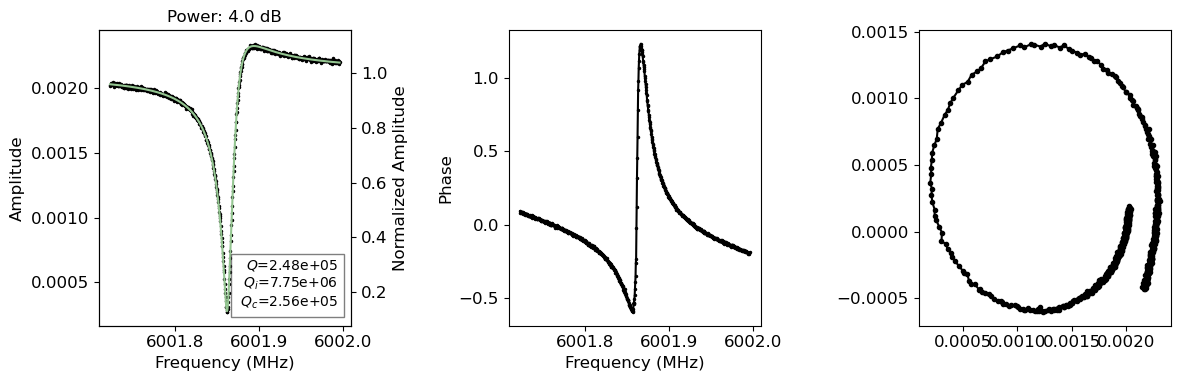

Time elapsed: 0.41 min, expected time: 0.20 min


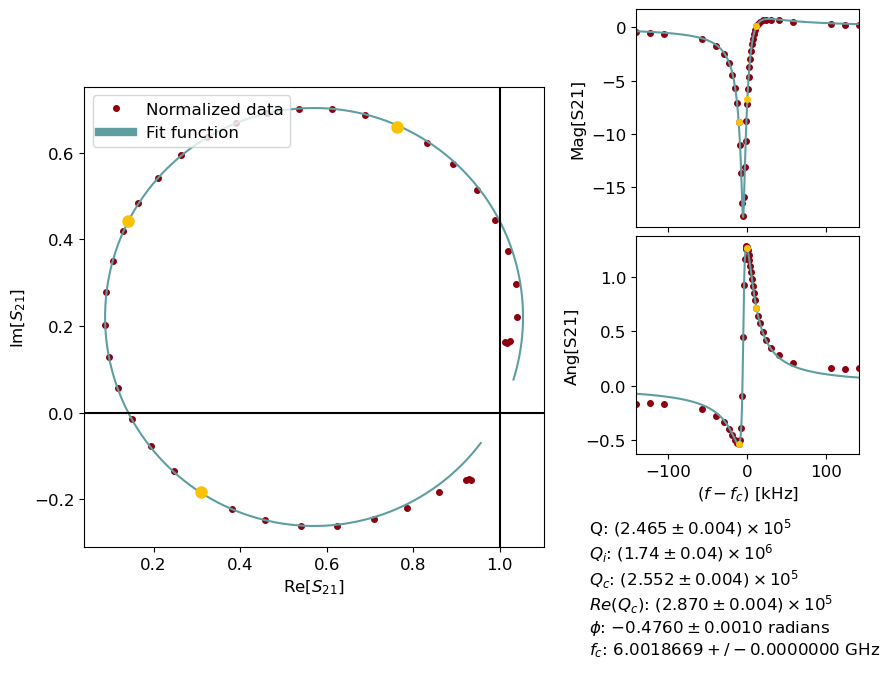

Saved fit results for frequency 6001.867000 MHz, power 4 dBm to CSV
Averaging factor: 0.067
Pin -98.0, N photons: 5.02e+05, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.40 min, expected time: 0.20 min


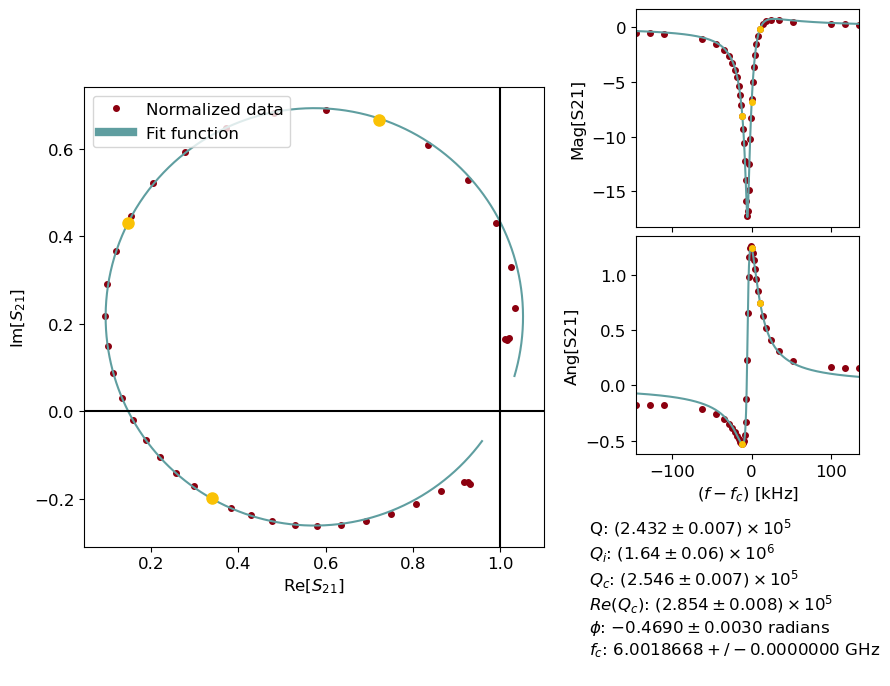

Saved fit results for frequency 6001.867000 MHz, power 0 dBm to CSV
Averaging factor: 0.172
Pin -102.0, N photons: 1.95e+05, navg: 0
Next time: 0.00 min, q_adj: 0.987
Time elapsed: 0.41 min, expected time: 0.20 min


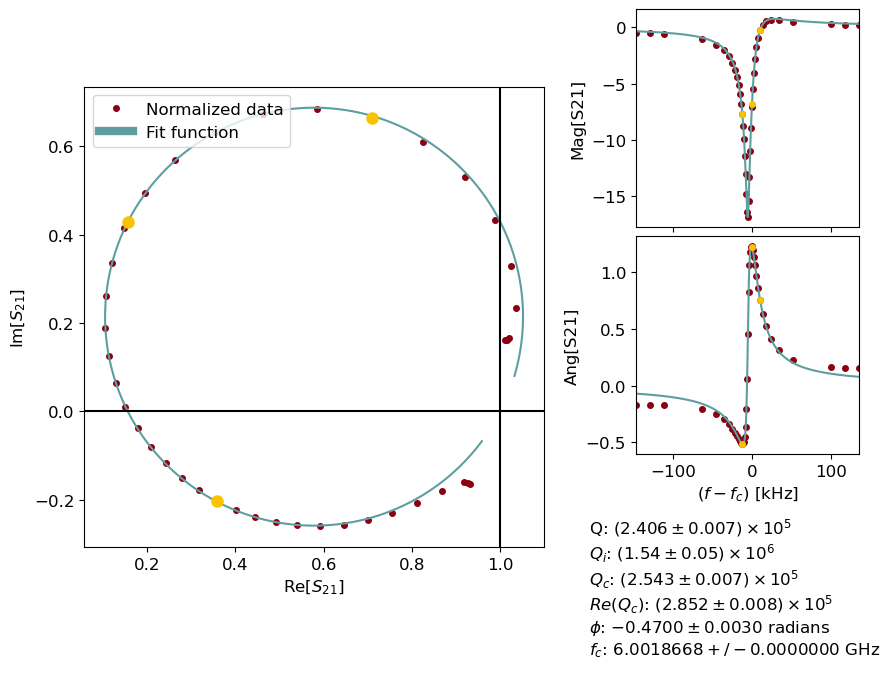

Saved fit results for frequency 6001.867000 MHz, power -4 dBm to CSV
Averaging factor: 0.441
Pin -106.0, N photons: 7.61e+04, navg: 0
Next time: 0.00 min, q_adj: 0.989
Time elapsed: 0.40 min, expected time: 0.20 min


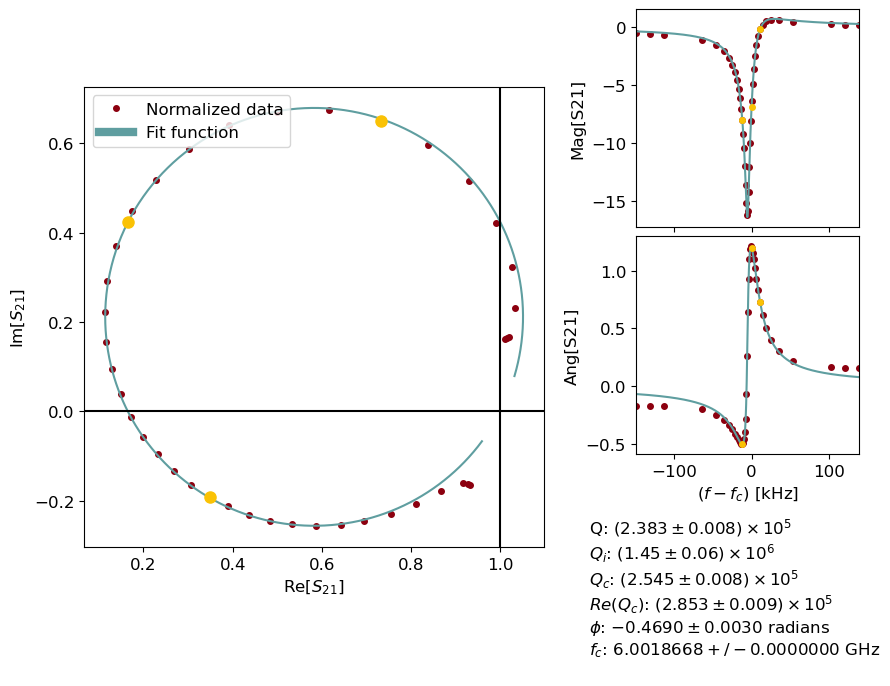

Saved fit results for frequency 6001.867000 MHz, power -8 dBm to CSV
Averaging factor: 1.134
Pin -110.0, N photons: 2.97e+04, navg: 0
Next time: 0.00 min, q_adj: 0.990
Time elapsed: 0.41 min, expected time: 0.20 min


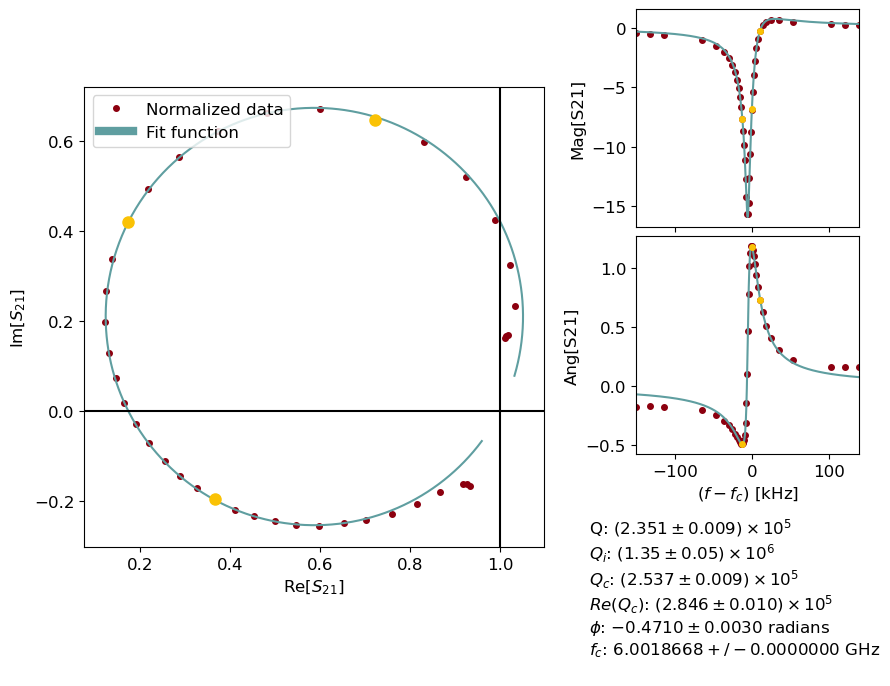

Saved fit results for frequency 6001.867000 MHz, power -12 dBm to CSV
Averaging factor: 2.911
Pin -114.0, N photons: 1.15e+04, navg: 0
Next time: 0.00 min, q_adj: 0.987
Time elapsed: 0.26 min, expected time: 0.12 min


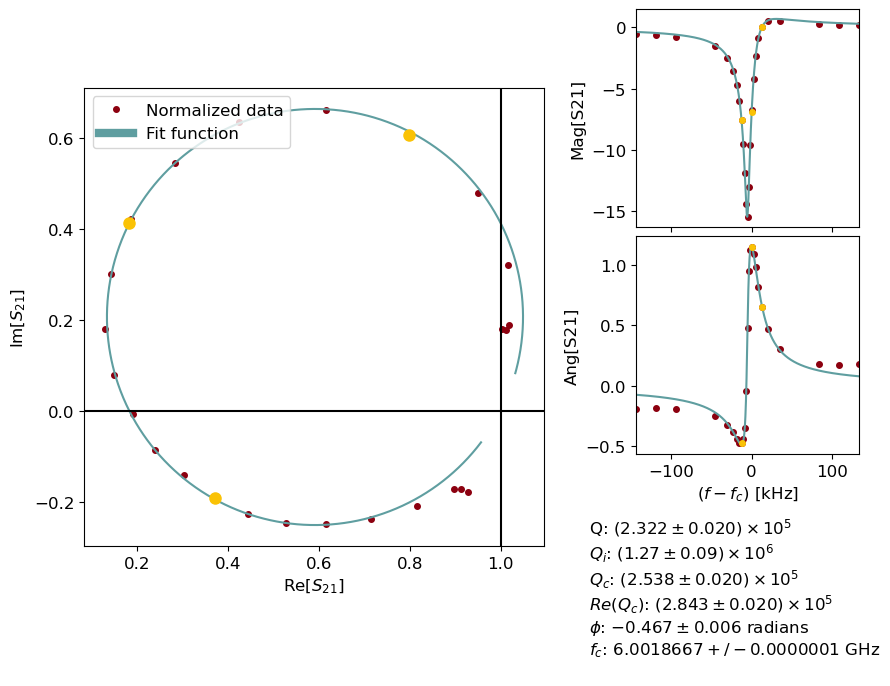

Saved fit results for frequency 6001.867000 MHz, power -16 dBm to CSV
Averaging factor: 7.456
Pin -118.0, N photons: 4.48e+03, navg: 1
Next time: 0.00 min, q_adj: 0.988
Time elapsed: 0.26 min, expected time: 0.12 min


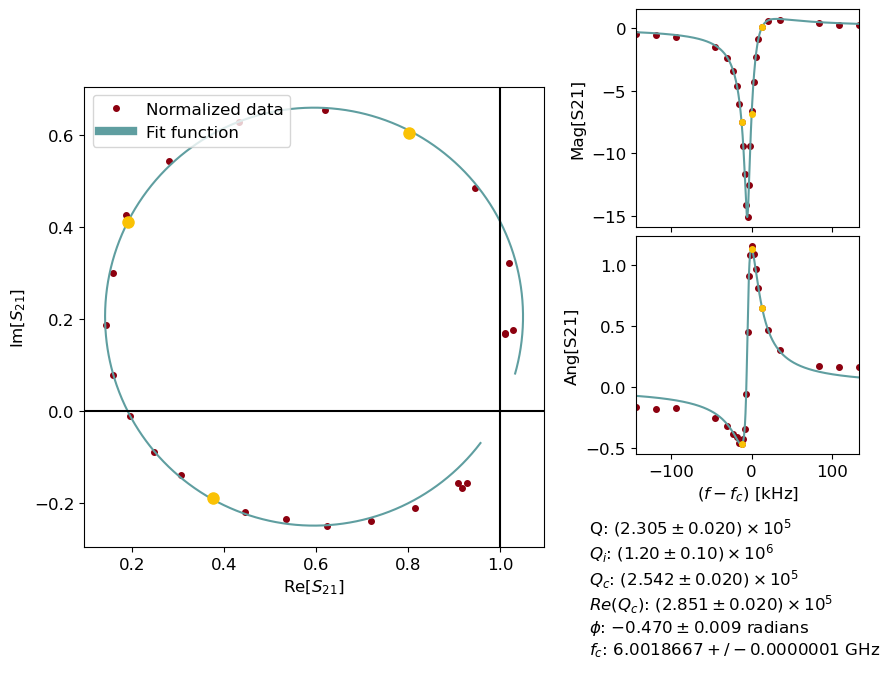

Saved fit results for frequency 6001.867000 MHz, power -20 dBm to CSV
Fit parameters: [1852376.9027 2368515.2974    3166.6506       0.4851]
Averaging factor: 19.297
Pin -122.0, N photons: 1.76e+03, navg: 2
Next time: 0.01 min, q_adj: 0.993
Time elapsed: 0.26 min, expected time: 0.12 min


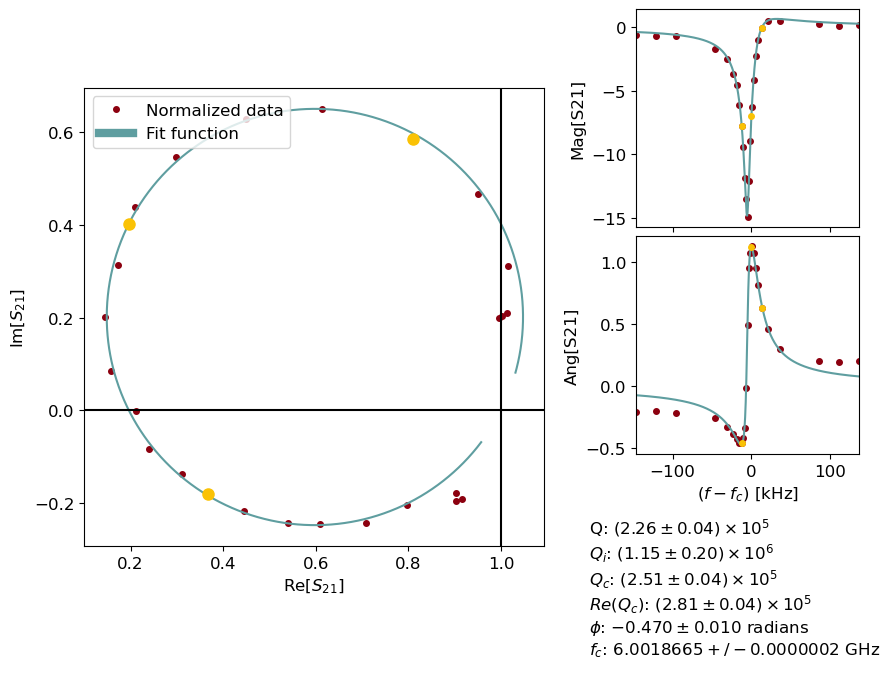

Saved fit results for frequency 6001.867000 MHz, power -24 dBm to CSV
Fit parameters: [1800483.7585 2402469.5158    2848.0062       0.471 ]
Averaging factor: 49.472
Pin -126.0, N photons: 679, navg: 6
Next time: 0.03 min, q_adj: 0.979
Time elapsed: 0.26 min, expected time: 0.12 min
Qi err: -inf


c:\Users\slab\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


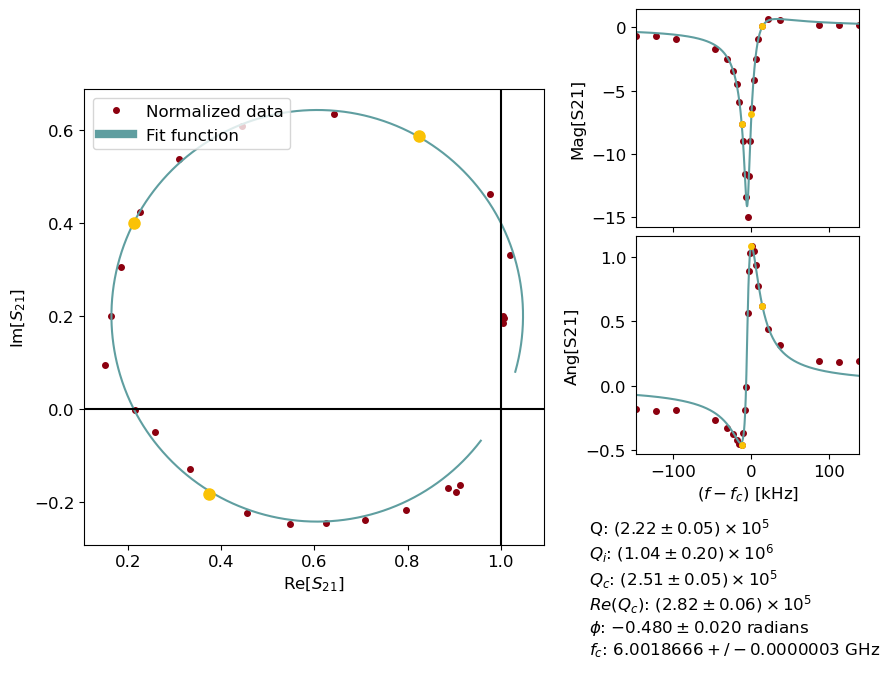

Saved fit results for frequency 6001.867000 MHz, power -28 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


C:\_Lib\python\scresonators\fit_resonator\ana_tls.py:31: RuntimeWarning: invalid value encountered in power
  return Qtls0 / tp(f, T) * np.sqrt(1 + (n / nc) ** beta * tp(f, T))


Averaging factor: 100.172
Pin -130.0, N photons: 261, navg: 12
Next time: 0.05 min, q_adj: 0.983
Time elapsed: 0.26 min, expected time: 0.12 min
Qi err: -inf


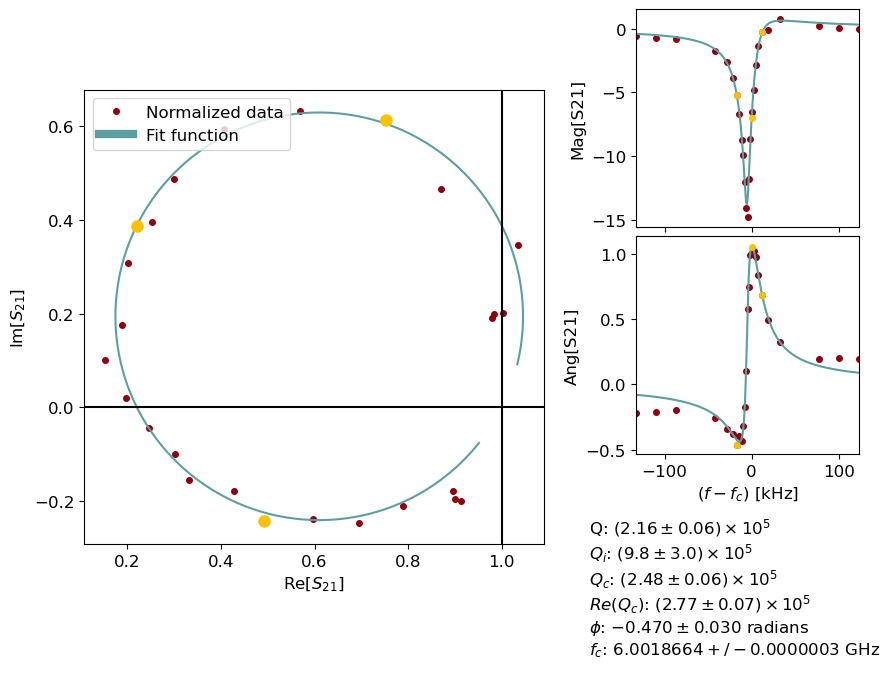

Saved fit results for frequency 6001.864000 MHz, power -32 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 251.620
Pin -134.0, N photons: 99.7, navg: 32
Next time: 0.13 min, q_adj: 0.971
Time elapsed: 0.26 min, expected time: 0.13 min
Qi err: -inf


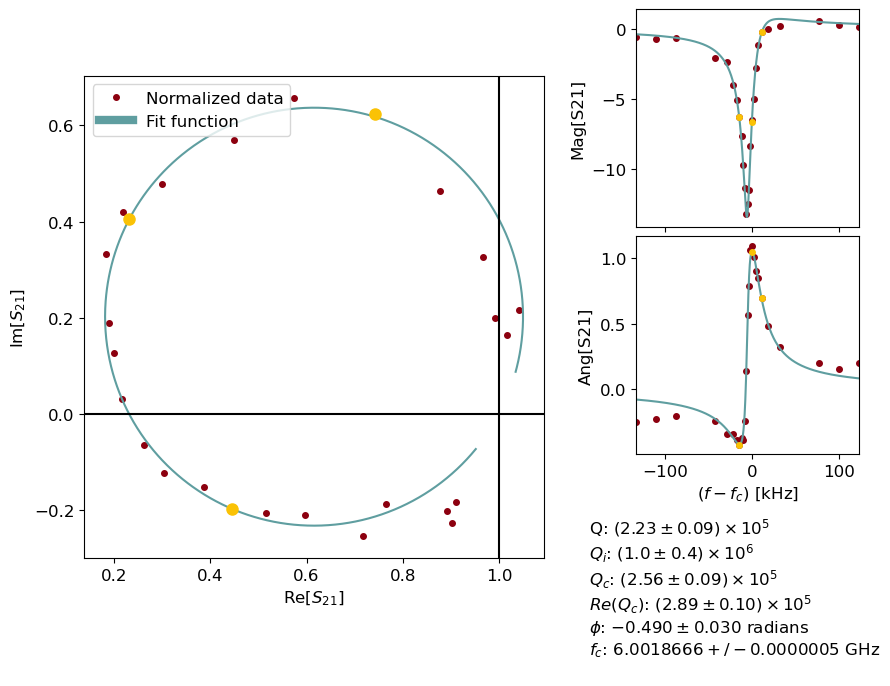

Saved fit results for frequency 6001.863000 MHz, power -36 dBm to CSV
Fit parameters: [ 631573.2123 5906824.3197       0.7652       0.1989]
Averaging factor: 632.041
Pin -138.0, N photons: 40.8, navg: 71
Next time: 0.30 min, q_adj: 1.032
Time elapsed: 0.41 min, expected time: 0.30 min
Qi err: -inf


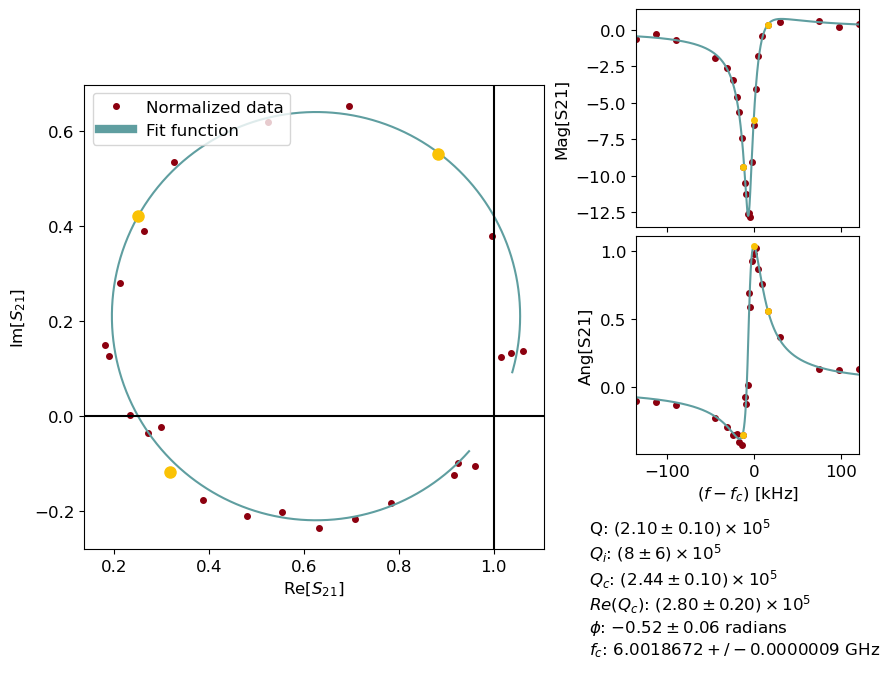

Saved fit results for frequency 6001.865000 MHz, power -40 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 1587.618
Pin -142.0, N photons: 15.2, navg: 214
Next time: 0.89 min, q_adj: 0.944
Time elapsed: 0.97 min, expected time: 0.89 min
Qi err: -inf


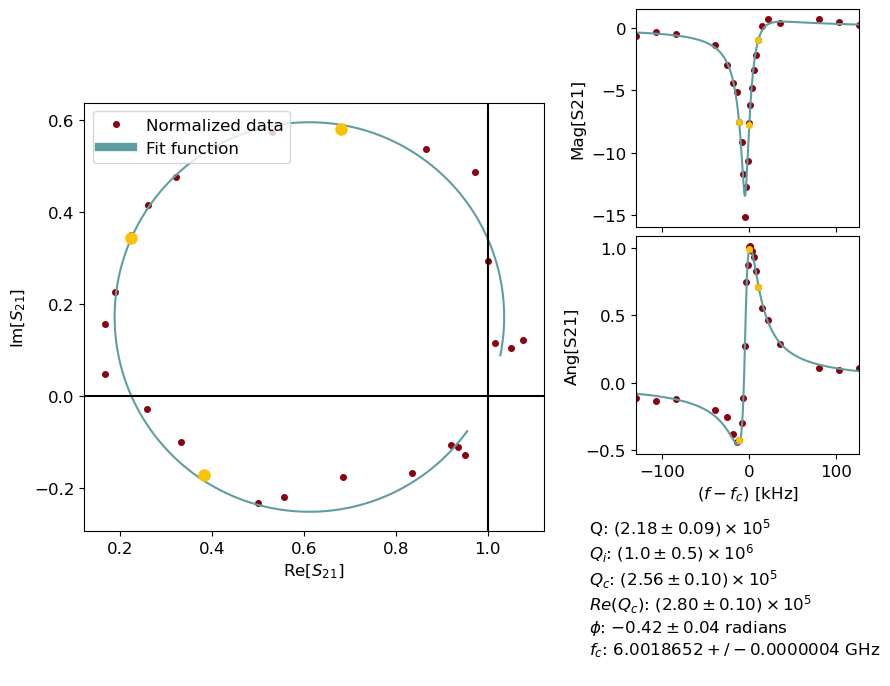

Saved fit results for frequency 6001.863000 MHz, power -44 dBm to CSV
Fit parameters: [1218829.189  2535885.9796     169.91         0.3707]
Averaging factor: 3987.910
Pin -146.0, N photons: 6.16, navg: 446
Next time: 1.86 min, q_adj: 1.036
Time elapsed: 1.87 min, expected time: 1.86 min
Qi err: -inf


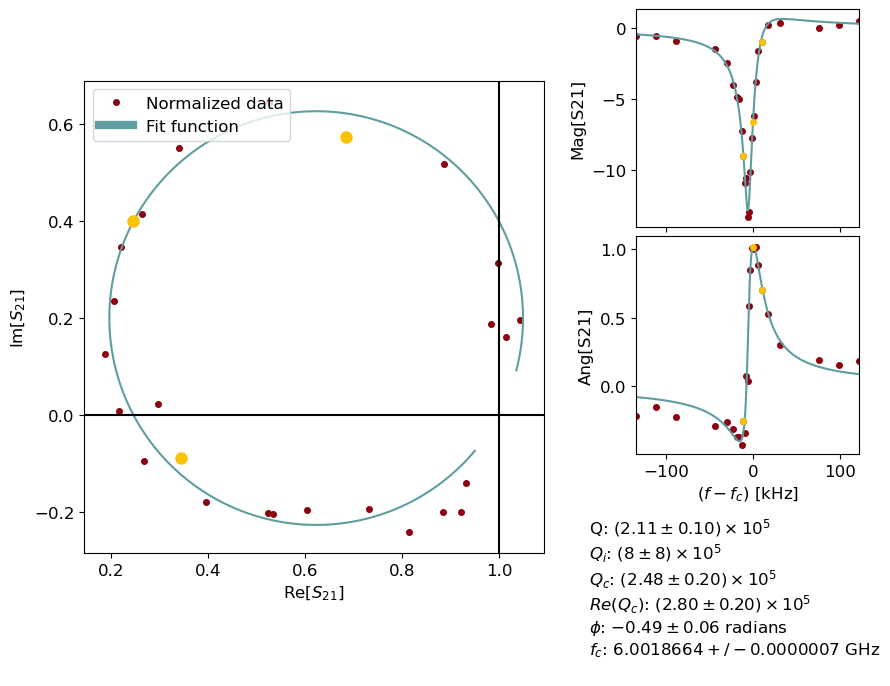

Saved fit results for frequency 6001.863000 MHz, power -48 dBm to CSV
Fit parameters: [1146713.8501 2664682.3711     121.6039       0.3467]
Averaging factor: 10017.174
Pin -150.0, N photons: 2.4, navg: 1271
Next time: 5.30 min, q_adj: 0.973
Time elapsed: 5.07 min, expected time: 5.30 min
Qi err: -inf


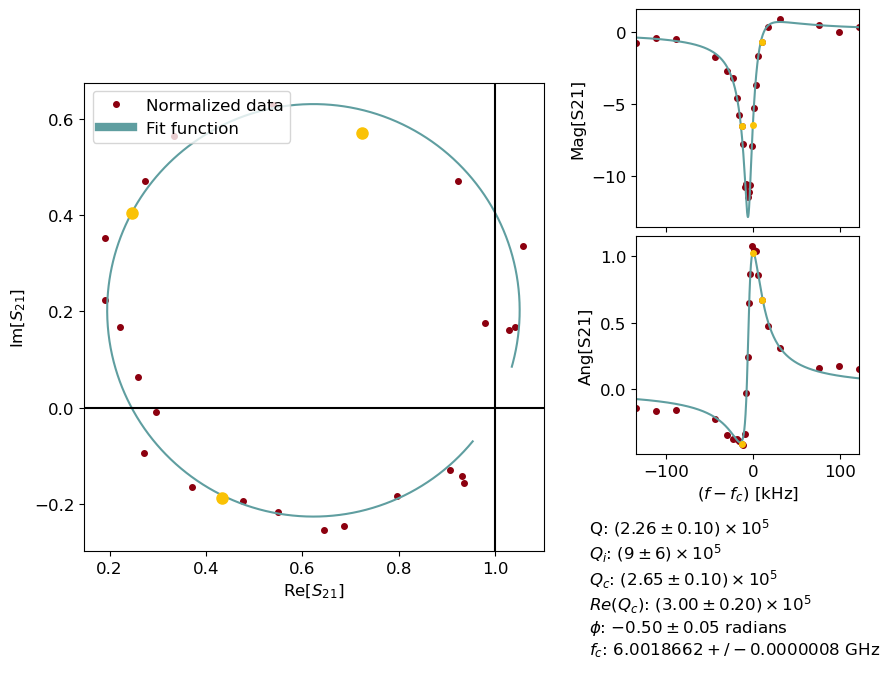

Saved fit results for frequency 6001.863000 MHz, power -52 dBm to CSV
Fit parameters: [1346571.1897 2338649.8603     267.7148       0.4192]
Averaging factor: 25161.998
Pin -154.0, N photons: 1.03, navg: 2629
Next time: 10.95 min, q_adj: 1.072
Time elapsed: 10.34 min, expected time: 10.95 min
Qi err: -inf


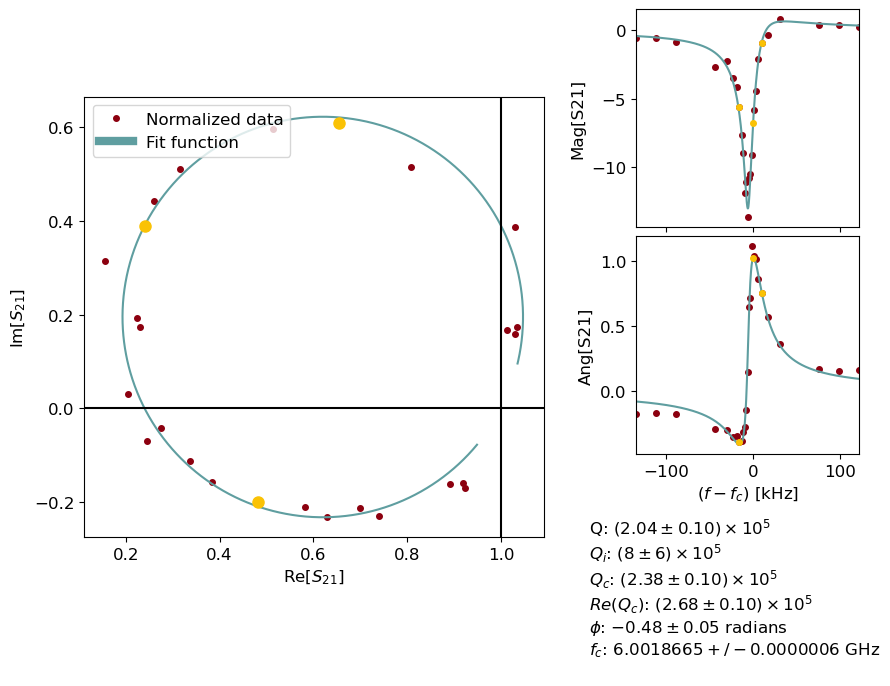

Saved fit results for frequency 6001.863000 MHz, power -56 dBm to CSV
Fit parameters: [1297760.7975 2409374.3038     229.0938       0.3998]
Averaging factor: 63204.094
Pin -158.0, N photons: 0.368, navg: 9370
Next time: 39.04 min, q_adj: 0.900
Time elapsed: 36.50 min, expected time: 39.04 min
Qi err: -inf


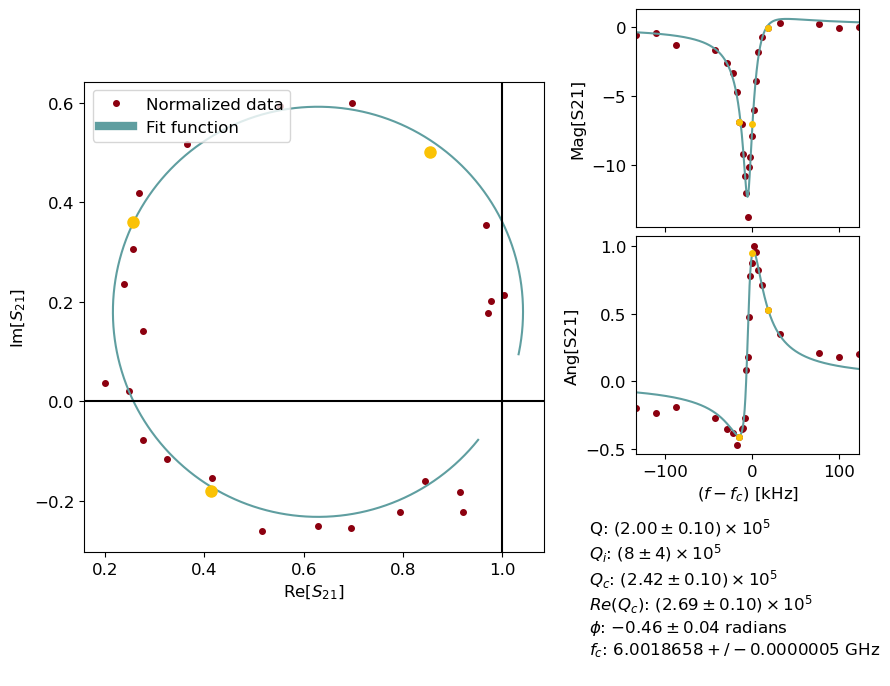

Saved fit results for frequency 6001.863000 MHz, power -60 dBm to CSV
Fit parameters: [1099567.1365 2891946.4316     117.323        0.3224]
Averaging factor: 158761.497
Pin -162.0, N photons: 0.139, navg: 19805
Next time: 82.52 min, q_adj: 0.981
Stopping frequency 6.00186 GHz


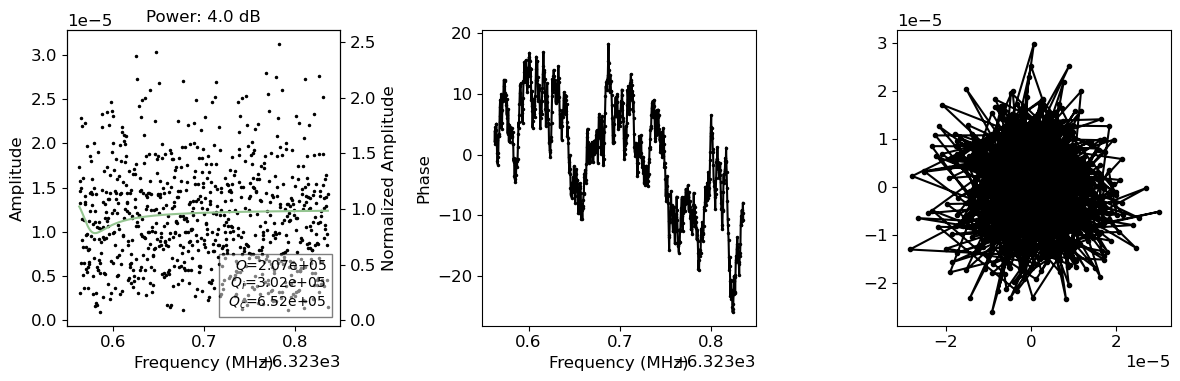

Time elapsed: 0.41 min, expected time: 0.20 min


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=2663.081630975451) = 0.8447366649910473 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=1446.5548837175616) = 0.8754546841574512 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=4339.664651152685) = 0.0 < max(sigmas)
  warn(errmsg)
C:\_Lib\python\scresonators\fit_resonator\fit.py:1014: RuntimeWarning: divide by zero encountered in double_scalars
  - (
C:\_Lib\python\scresonators\fit_resonator\fit.py:1045: RuntimeWarning: divide by zero encountered in double_scalars
  Qc_Re_neg = 1 / np.real(np.exp(1j * fit_params[3]) / ci["Qc"][0][1])
C:\_Lib\python\scresonators\fit_resonator\fit.py:1046: RuntimeWarning: divide by zero encountered in double_scalars
  Qc_Re_pos = 1 / np.real(np.exp(1j * fit_params[3]) / ci["Qc"

Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6323.593000 MHz, power 4 dBm to CSV
Averaging factor: 0.846
Pin -98.0, N photons: 2.51e+04, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.41 min, expected time: 0.20 min


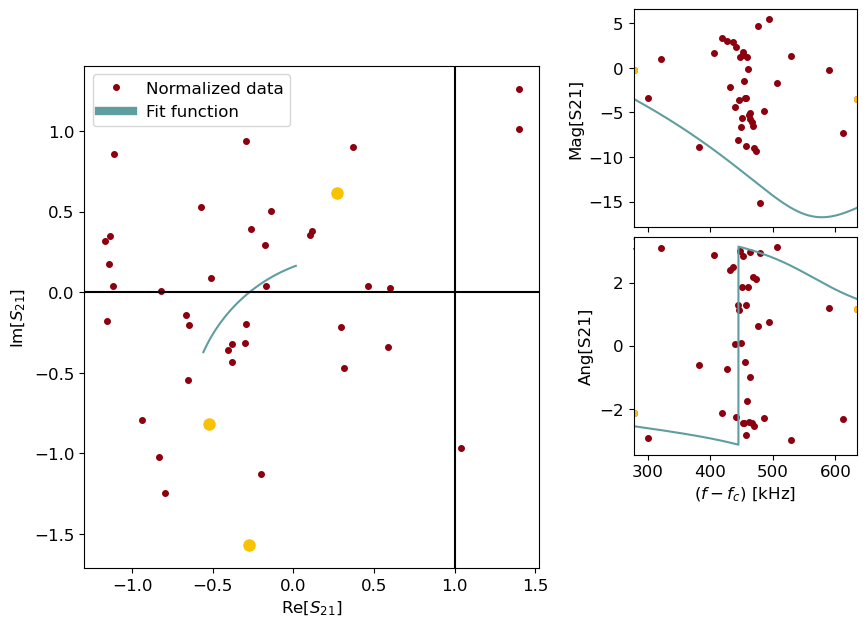

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=7921.522546484731) = 0.9208269692718163 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=11612.668039940863) = 0.09988341754623593 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=34838.00411982259) = 0.7260704606503293 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:323: UserWarning: maxiter=200 reached and prob(phi=-1.2222066250853425) = 0.8327735786570303 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:323: UserWarning: maxiter=200 reached and prob(phi=1.2845641059570445) = 0.8480210832098136 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6323.600000 MHz, power 0 dBm to CSV
Averaging factor: 2.125
Pin -102.0, N photons: 5.74e+03, navg: 0
Next time: 0.00 min, q_adj: 1.345
Time elapsed: 0.41 min, expected time: 0.20 min


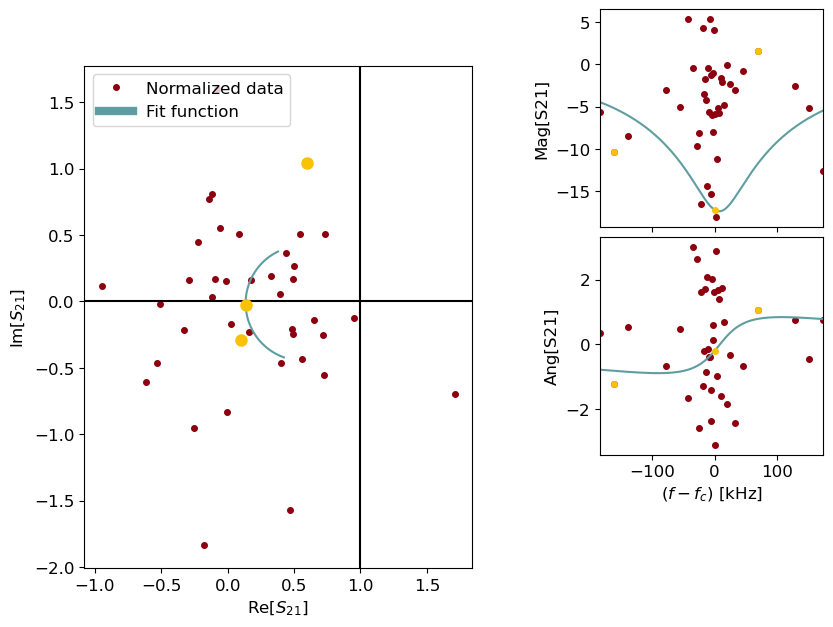

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=14679.560620318925) = 0.788640524016427 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=97863.73746879284) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=10819.873721169412) = 0.10624402497567442 < max(sigmas)
  warn(errmsg)
C:\_Lib\python\scresonators\fit_resonator\fit.py:1022: RuntimeWarning: divide by zero encountered in double_scalars
  - (


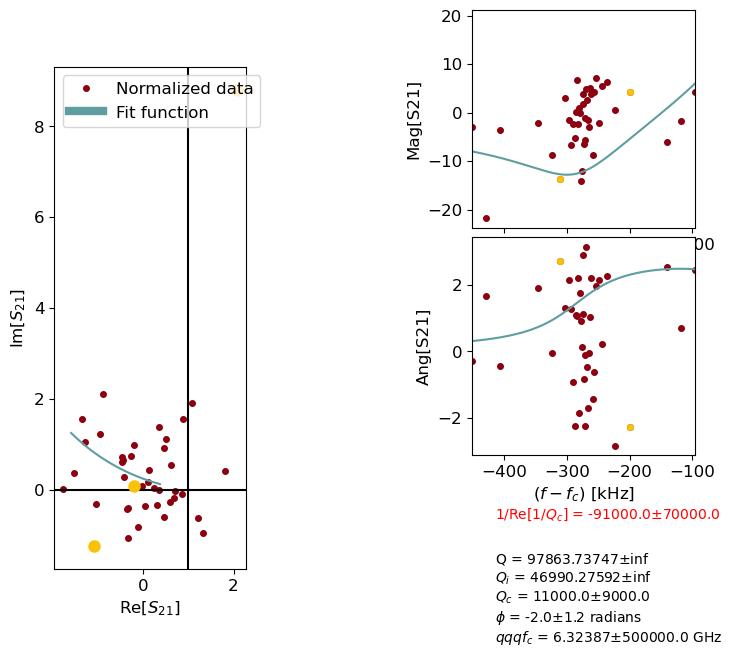

Saved fit results for frequency 6323.444000 MHz, power -4 dBm to CSV
Averaging factor: 5.337
Pin -106.0, N photons: 1.94e+05, navg: 0
Next time: 0.00 min, q_adj: 8.297
Time elapsed: 0.41 min, expected time: 0.20 min
Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway
Improper input: func input vector length N=3 must not exceed func output vector length M=2
>Failed to find confidence intervals for least squares fit


c:\Users\slab\anaconda3\lib\site-packages\lmfit\minimizer.py:855: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = np.sqrt(self.result.covar[ivar, ivar])
c:\Users\slab\anaconda3\lib\site-packages\lmfit\minimizer.py:862: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * np.sqrt(self.result.covar[jvar, jvar])))


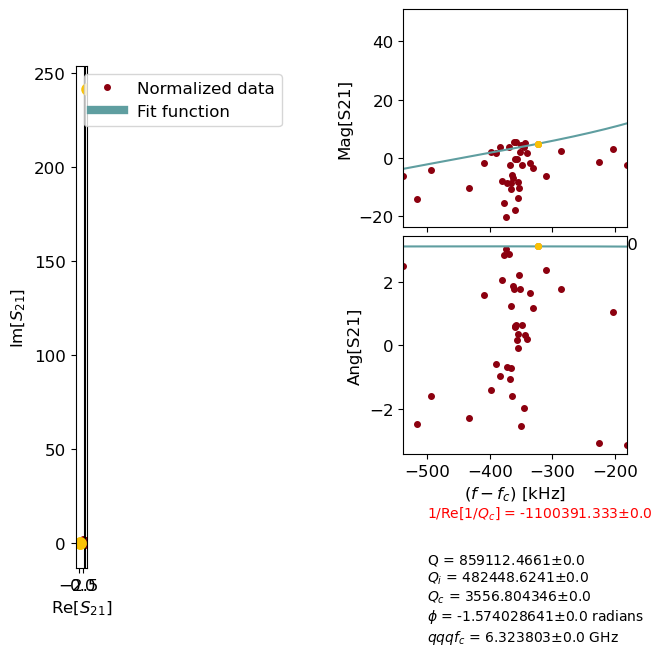

Saved fit results for frequency 6323.429000 MHz, power -8 dBm to CSV
Averaging factor: 13.406
Pin -110.0, N photons: 1.85e+07, navg: 0
Next time: 0.00 min, q_adj: 8.779
Time elapsed: 0.41 min, expected time: 0.20 min


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=352.7657406515694) = 0.3097759566846102 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=2351.771604343796) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=426.91182092025446) = 0.2657651251612656 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=1280.7354627607633) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6323.430000 MHz, power -12 dBm to CSV
Averaging factor: 33.675
Pin -114.0, N photons: 121, navg: 683059
Next time: 2846.08 min, q_adj: 0.002
Stopping frequency 6.32343 GHz


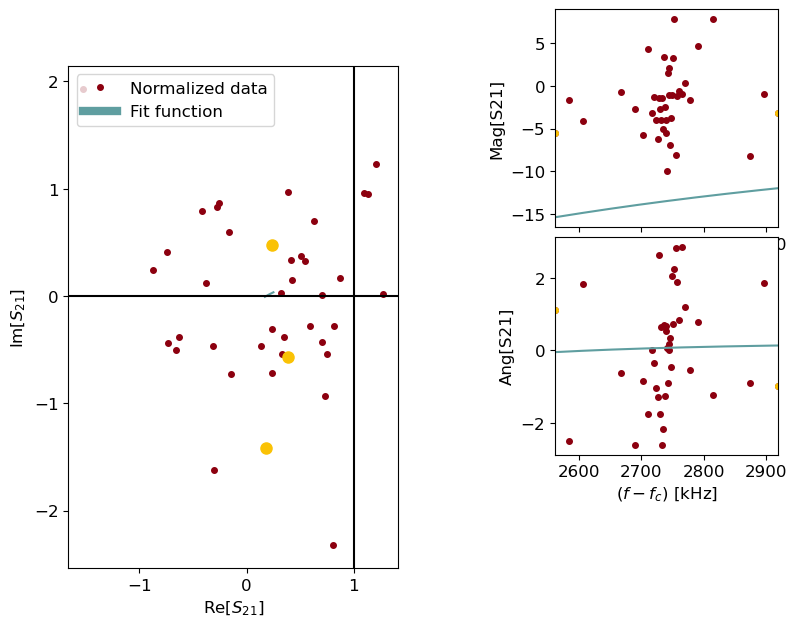

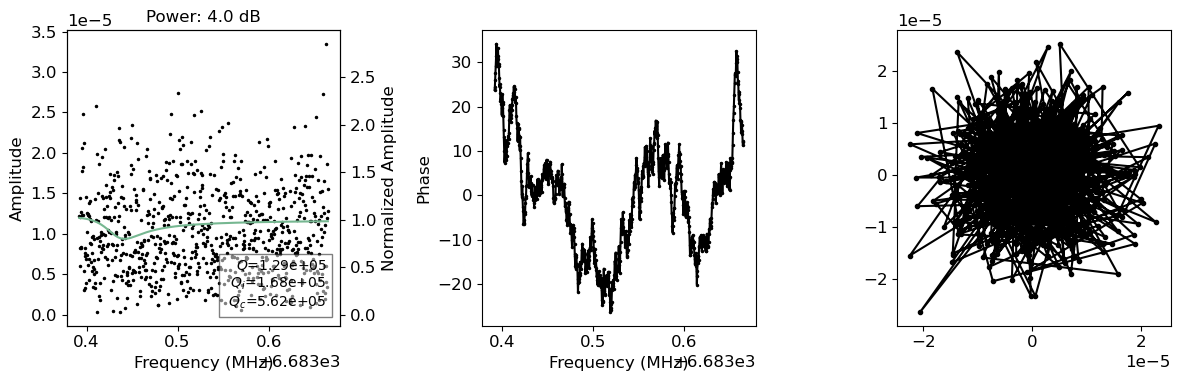

Time elapsed: 0.41 min, expected time: 0.20 min


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=76593.77643564955) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=13226.221570556807) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.437000 MHz, power 4 dBm to CSV
Averaging factor: 2.238
Pin -98.0, N photons: 4.03e+05, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.41 min, expected time: 0.20 min


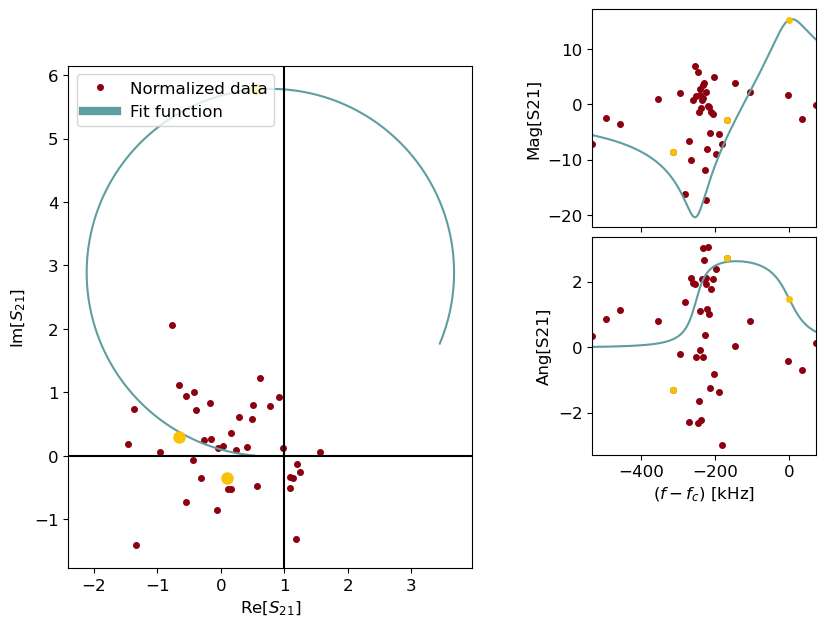

Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway
Improper input: func input vector length N=3 must not exceed func output vector length M=2
>Failed to find confidence intervals for least squares fit
Monte Carlo fit got better fitting parameters


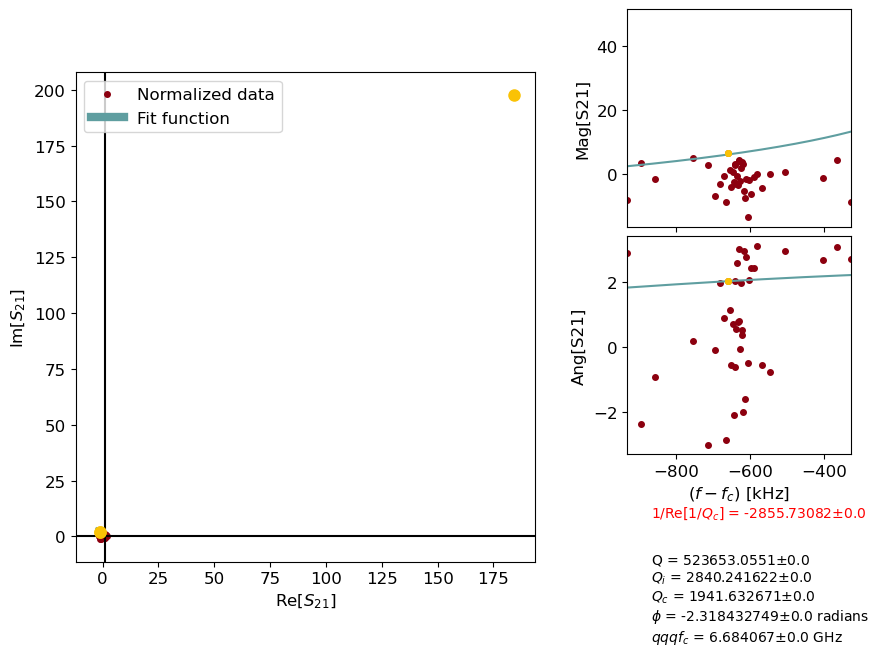

Saved fit results for frequency 6683.461000 MHz, power 0 dBm to CSV
Averaging factor: 5.622
Pin -102.0, N photons: 5.11e+07, navg: 0
Next time: 0.00 min, q_adj: 6.837
Time elapsed: 0.41 min, expected time: 0.20 min


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.6687613371213533 < 1e-05 at iteration 2 and prob(Q=16370.195173582164) = 0.16666996859281746 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=39345.828804620316) = 0.06808018817376198 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=6708.026783781311) = 0.0 < max(sigmas)
  warn(errmsg)


Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.464000 MHz, power -4 dBm to CSV
Averaging factor: 14.122
Pin -106.0, N photons: 1.6e+04, navg: 624
Next time: 2.60 min, q_adj: 0.052
Time elapsed: 4.10 min, expected time: 4.16 min


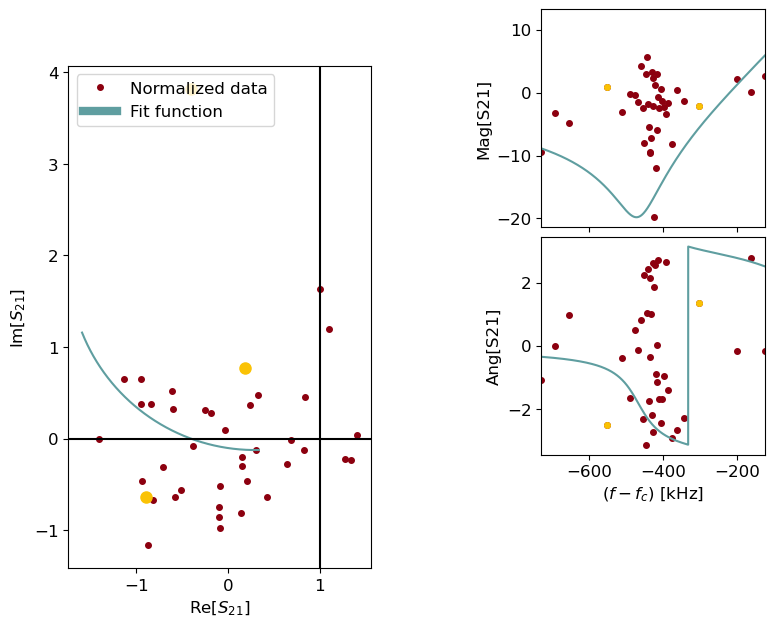

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=428.76698104489935) = 0.4364858608267778 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=267.1122633173313) = 0.5513638457881551 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=801.336789951994) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.8738924520520415 < 1e-05 at iteration 3 and prob(phi=0.04370976094411165) = 0.03332271049469654 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.8487308871007511 < 1e-05 at iteration 13 and prob(phi=0.39338784849700476) = 0.14427351185606155 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.200000 MHz, power -8 dBm to CSV
Averaging factor: 35.463
Pin -110.0, N photons: 43.7, navg: 5182
Next time: 21.59 min, q_adj: 0.029
Time elapsed: 32.29 min, expected time: 34.55 min


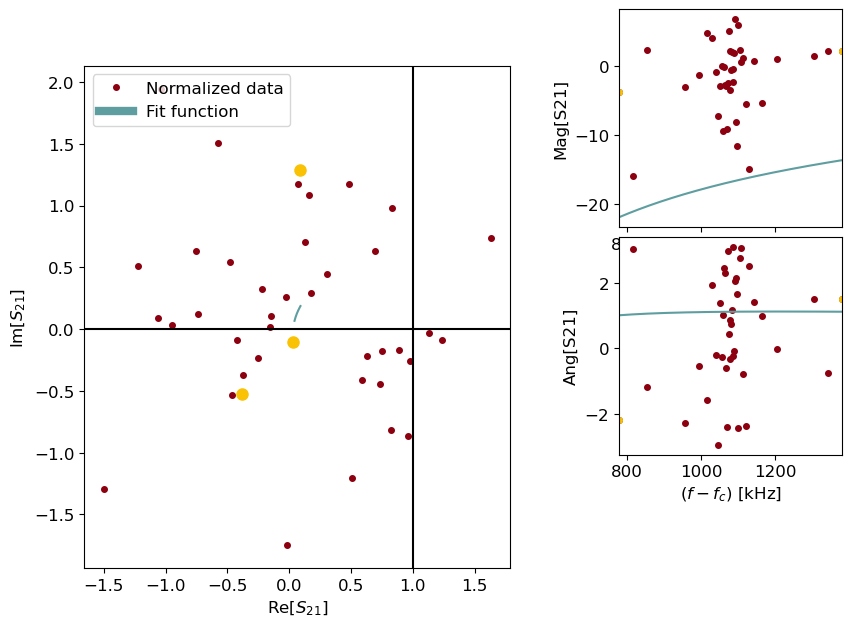

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=5946.328602118195) = 0.7719504498892253 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=39642.190680787964) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=6016.4902460843205) = 0.5144517812418881 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.006557022666733363 < 1e-05 at iteration 3 and prob(w1=6682537994.045459) = 0.9296402037427909 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.209000 MHz, power -12 dBm to CSV
Averaging factor: 89.080
Pin -114.0, N photons: 2.92e+03, navg: 0
Next time: 0.00 min, q_adj: 50.704
Time elapsed: 0.27 min, expected time: 0.12 min


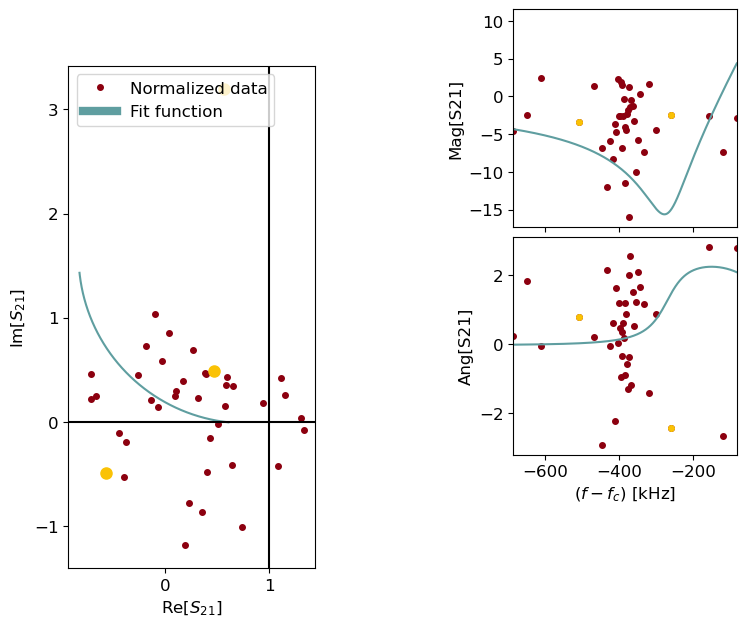

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=1561.5288373364845) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=2342.2932560047266) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=812.9737743852471) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=981.0726793414431) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.048080970652606095 < 1e-05 at iteration 4 and prob(phi=0.24069178563872942) = 0.20205366493573074 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330:

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.262000 MHz, power -16 dBm to CSV
Averaging factor: 223.771
Pin -118.0, N photons: 42.3, navg: 11076
Next time: 46.15 min, q_adj: 0.049
Time elapsed: 43.11 min, expected time: 46.15 min


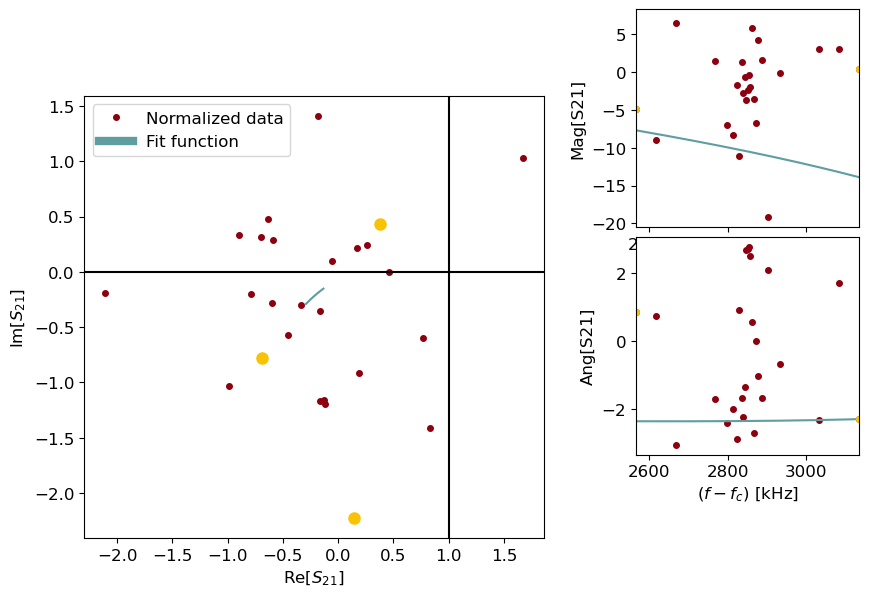

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=2224.9599541831712) = 0.8789672551725796 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Q=6145.635765522998) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=2856.6741279419616) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(Qc=3922.8702479239823) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=0.0 < 1e-05 at iteration 1 and prob(phi=-1.1607496110602737) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.0046218574483

>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.299000 MHz, power -20 dBm to CSV
Fit parameters: [ 32126.6153 552567.2332     29.2926    -39.7503]
Averaging factor: 562.106
Pin -122.0, N photons: 29, navg: 10
Next time: 0.04 min, q_adj: 2.624
Time elapsed: 0.27 min, expected time: 0.12 min


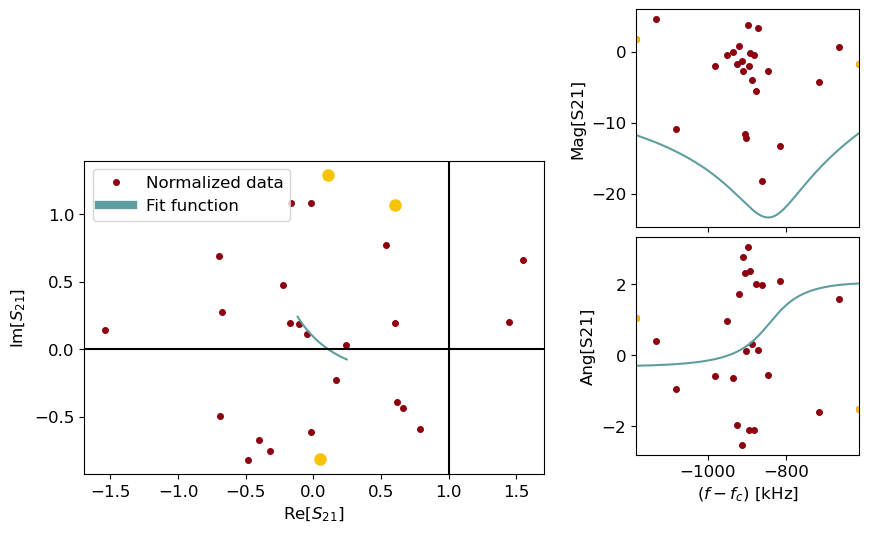

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=1162.470796742034) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=233.28243550527546) = 0.1574629935616049 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=699.8473065158264) = 0.023583580006972932 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.092000 MHz, power -24 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 361.277
Pin -126.0, N photons: 2.98, navg: 841
Next time: 3.50 min, q_adj: 0.227
Time elapsed: 3.41 min, expected time: 3.50 min
Qi err: 4.026356431428397


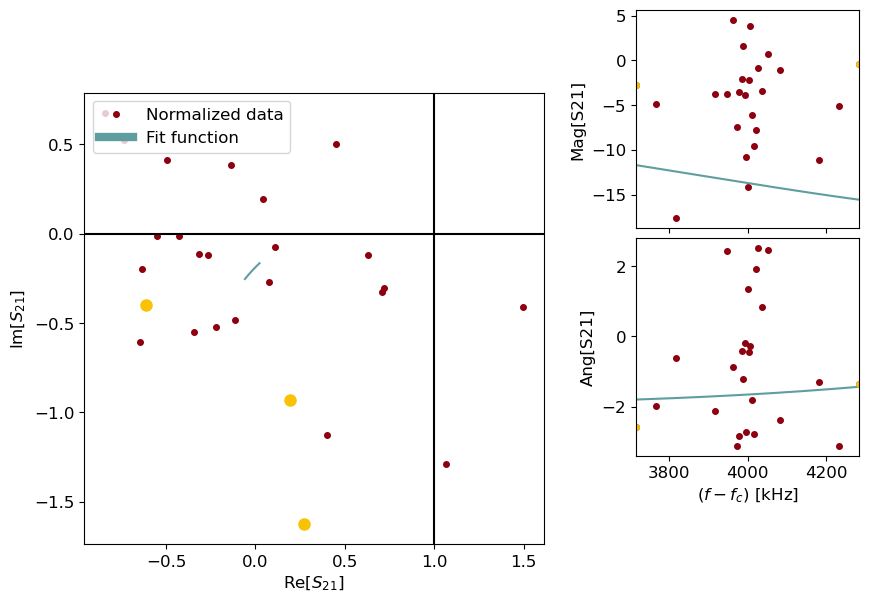

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.37419827733315436 < 1e-05 at iteration 4 and prob(Q=13756.478799549019) = 0.5830522143800811 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=68782.4524833336) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=12218.456121127703) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-1.0 < 1e-05 at iteration 2 and prob(phi=1.2007690362355523) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.075000 MHz, power -28 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 264.708
Pin -130.0, N photons: 222, navg: 0
Next time: 0.00 min, q_adj: 59.169
Time elapsed: 0.26 min, expected time: 0.12 min
Qi err: -inf


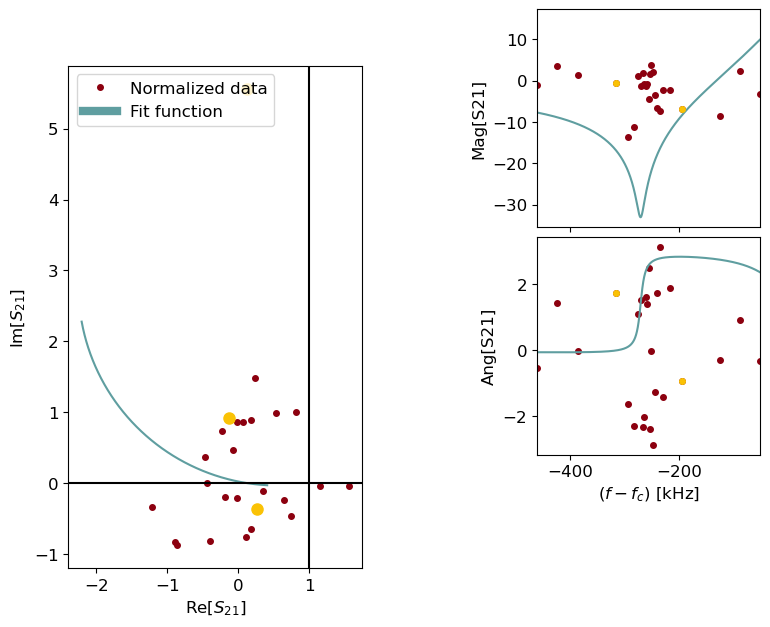

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=2770.8220418011565) = 0.4083348817487569 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=18472.146945341043) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=2177.7424570957633) = 0.3670463521672015 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=6533.22737128729) = 0.6942327514374423 < max(sigmas)
  warn(errmsg)


Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.071000 MHz, power -32 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 471.225
Pin -134.0, N photons: 13.1, navg: 784
Next time: 3.27 min, q_adj: 0.269
Time elapsed: 3.19 min, expected time: 3.27 min
Qi err: -inf


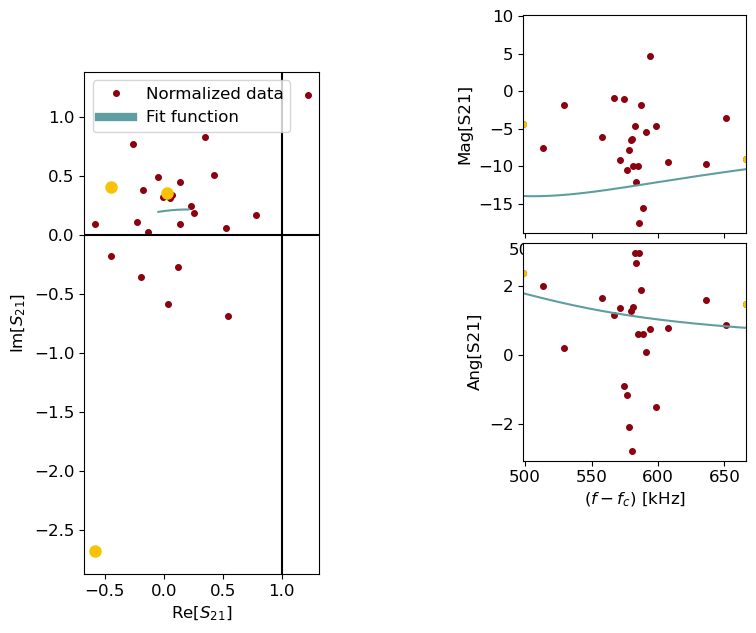

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=3520.745179015605) = 0.8768311909709665 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=4392.086977533218) = 0.80324219236939 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=13176.260932599653) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.49375581608974944 < 1e-05 at iteration 5 and prob(phi=0.9719831762690576) = 0.4211531131399815 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.152000 MHz, power -36 dBm to CSV
Fit parameters: [29897.2966 83113.2448     0.         0.7457]
Averaging factor: 1183.752
Pin -138.0, N photons: 1.36, navg: 245
Next time: 1.02 min, q_adj: 0.762
Time elapsed: 1.10 min, expected time: 1.02 min
Qi err: -inf


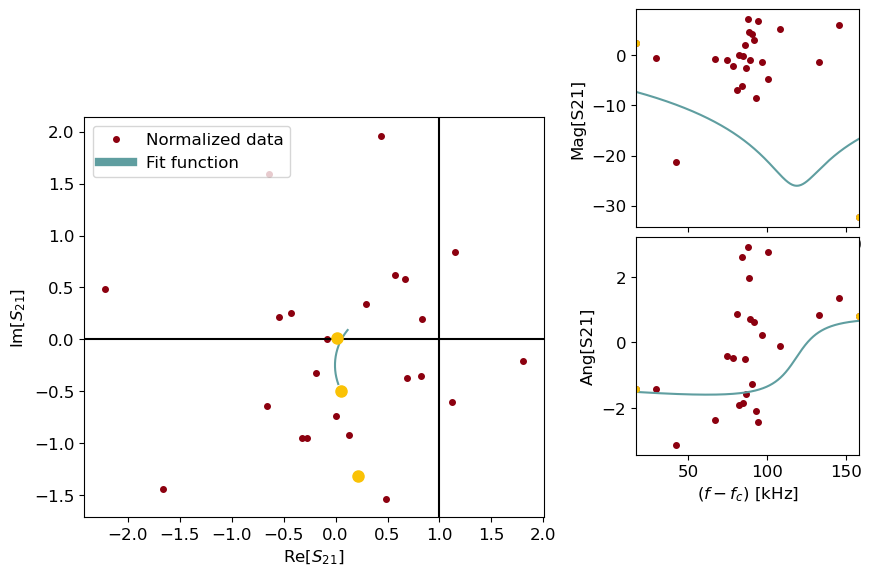

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=9346.545182099851) = 0.9261069465132667 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=62310.30121399902) = 0.5490472016725143 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=10381.550755712922) = 0.5578698246115456 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=31144.652267138765) = 0.17424605581516928 < max(sigmas)
  warn(errmsg)


Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.210000 MHz, power -40 dBm to CSV
Fit parameters: [-2144466.0149   515072.2902        0.            0.6808]
Averaging factor: 2973.611
Pin -142.0, N photons: 2.49, navg: 37
Next time: 0.15 min, q_adj: 3.090
Time elapsed: 0.29 min, expected time: 0.15 min
Qi err: -inf


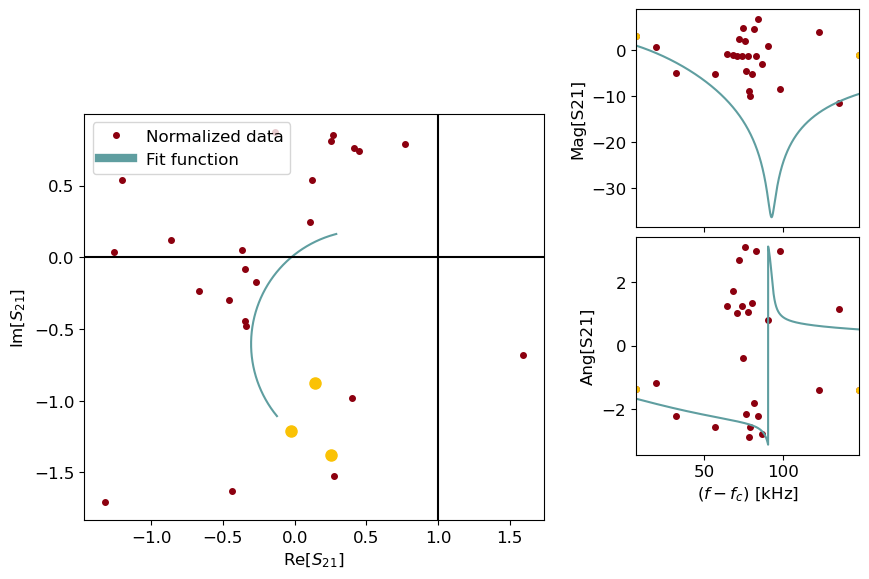

Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway
Improper input: func input vector length N=3 must not exceed func output vector length M=2
>Failed to find confidence intervals for least squares fit


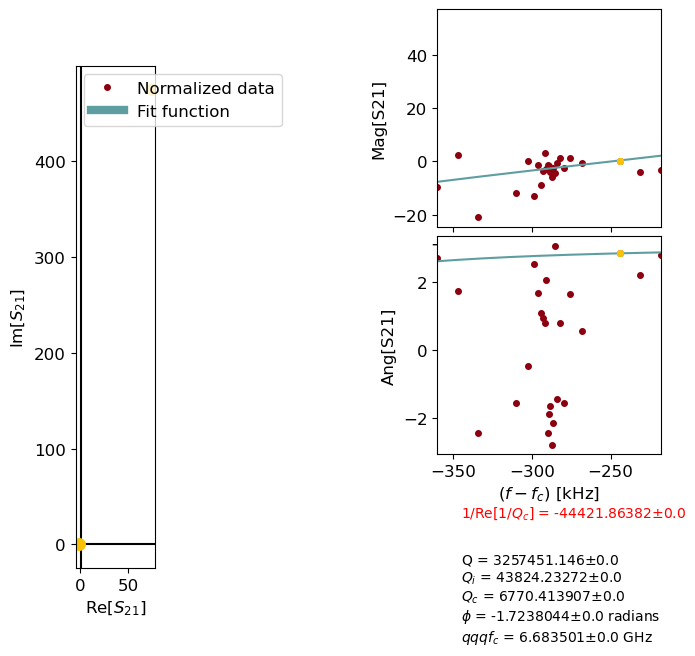

Saved fit results for frequency 6683.165000 MHz, power -44 dBm to CSV
Fit parameters: [-2150651.1682   512997.6577        0.            0.6729]
Averaging factor: 7469.058
Pin -146.0, N photons: 2.26e+04, navg: 0
Next time: 0.00 min, q_adj: 74.921
Time elapsed: 0.26 min, expected time: 0.12 min
Qi err: -inf


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=315.3543405076029) = 0.38297021094333655 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=2102.362270050686) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=306.2459849221426) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6683.174000 MHz, power -48 dBm to CSV
Fit parameters: [-2134605.4751   510344.5061        0.            0.6807]
Averaging factor: 18761.591
Pin -150.0, N photons: 0.0827, navg: 5404949310
Next time: 22520622.12 min, q_adj: 0.001
Stopping frequency 6.68317 GHz


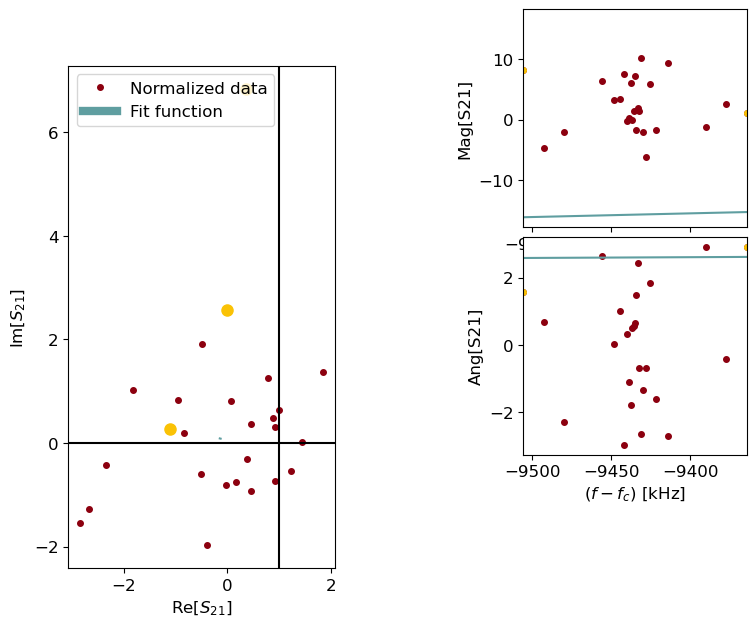

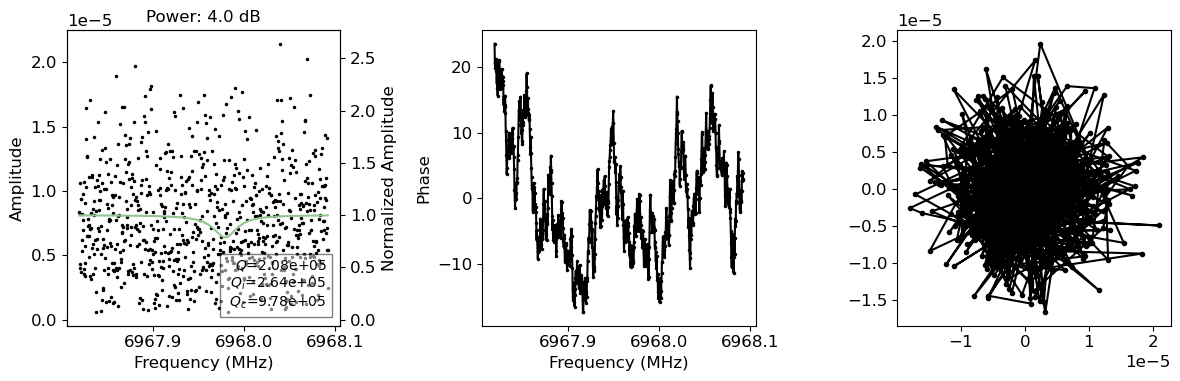

Time elapsed: 0.41 min, expected time: 0.20 min
Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway
Improper input: func input vector length N=3 must not exceed func output vector length M=2
>Failed to find confidence intervals for least squares fit


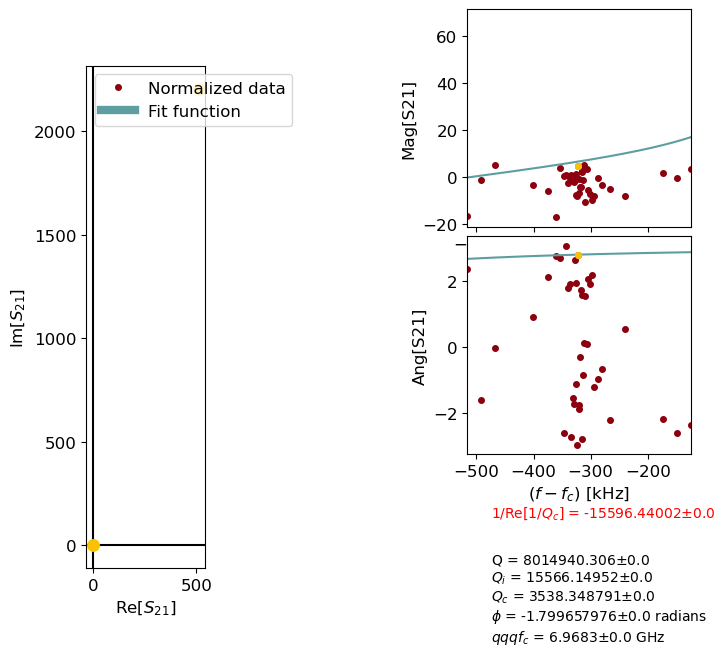

Saved fit results for frequency 6967.939000 MHz, power 4 dBm to CSV
Averaging factor: 3.407
Pin -98.0, N photons: 1.17e+10, navg: 1
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.41 min, expected time: 0.20 min


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=1490.4351375182273) = 0.6425130861144881 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=1139.2112254770939) = 0.7468155621624663 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=3417.633676431282) = 0.0 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 6967.952000 MHz, power 0 dBm to CSV
Averaging factor: 8.558
Pin -102.0, N photons: 709, navg: 6973481
Next time: 29056.17 min, q_adj: 0.000
Stopping frequency 6.96795 GHz


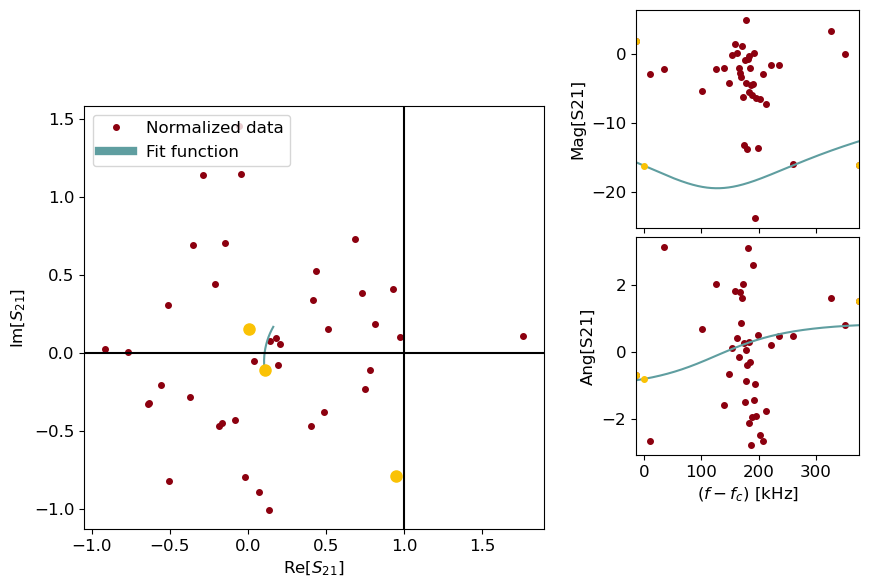

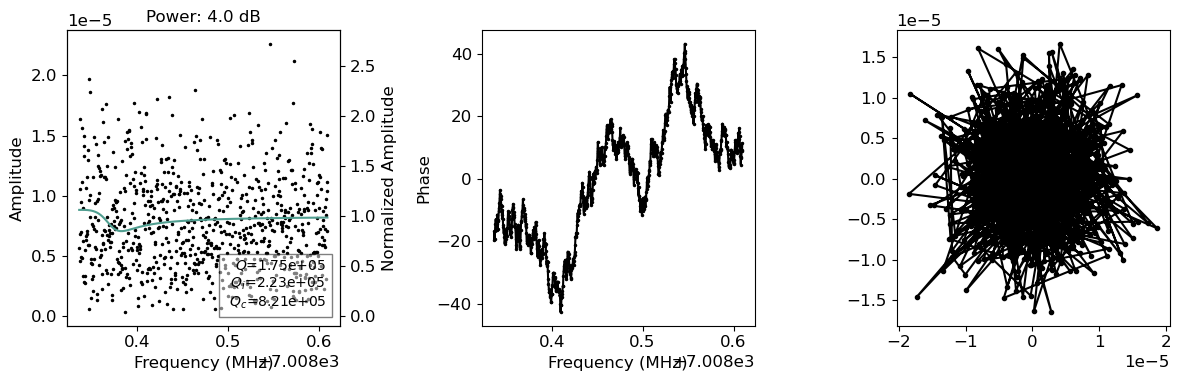

Time elapsed: 0.41 min, expected time: 0.20 min
Attempted to init fitparam 0 to 7008602720.899749, which is out of bounds 7008136766.04572 to 7008602720.899749. Instead init to 7008369743.472734


c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=8937.452702907289) = 0.9085291827781155 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=59583.01801938193) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=9707.962322963098) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=29123.886968889296) = 0.9435478890169663 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.370000 MHz, power 4 dBm to CSV
Averaging factor: 3.498
Pin -98.0, N photons: 2.24e+05, navg: 1
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.41 min, expected time: 0.20 min


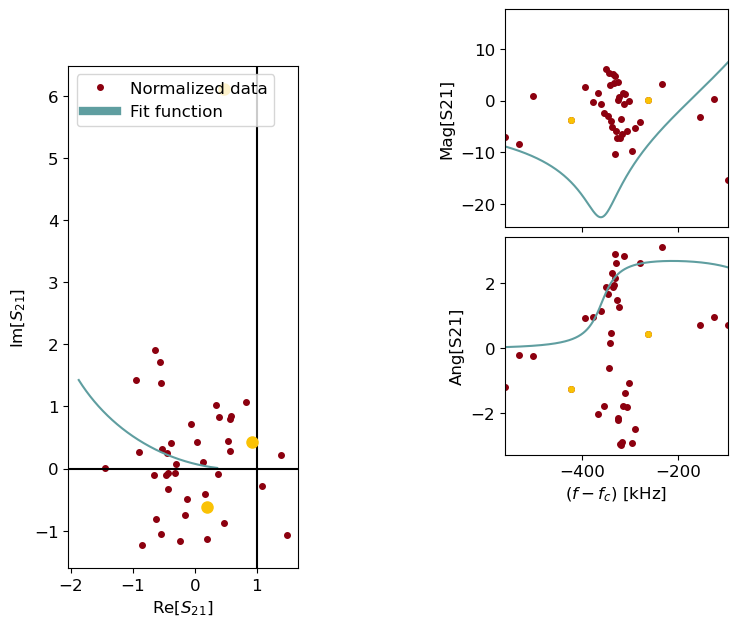

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.724535406989792 < 1e-05 at iteration 3 and prob(Q=8063.8542518466475) = 0.1778815950599075 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=20159.646987252658) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=3720.2909223266147) = 1.033090603211913e-07 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=11160.872766979845) = 0.8220972600662834 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.042424245176835046 < 1e-05 at iteration 2 and prob(phi=1.2204416479861577) = 0.7132057513941521 < max(sigmas)
  warn(errmsg)


Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.587000 MHz, power 0 dBm to CSV
Averaging factor: 8.789
Pin -102.0, N photons: 2.66e+04, navg: 9
Next time: 0.04 min, q_adj: 0.338
Time elapsed: 0.41 min, expected time: 0.20 min


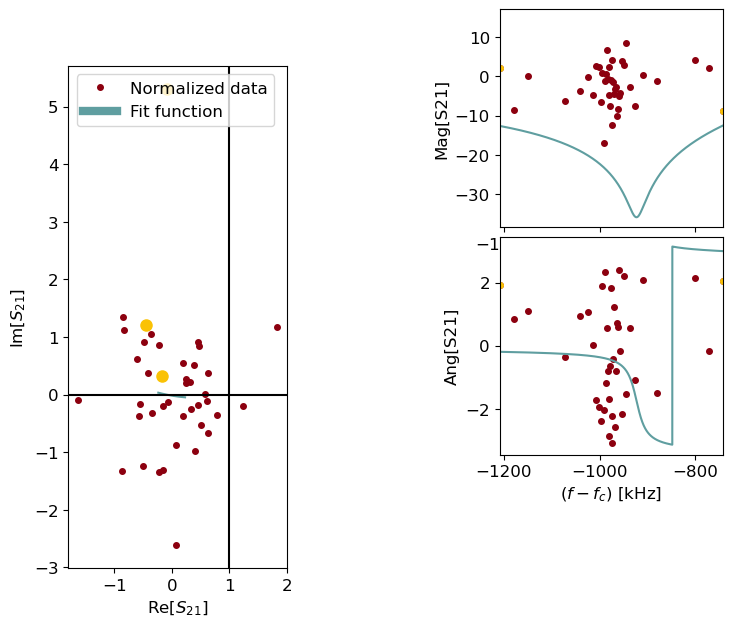

Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway
Improper input: func input vector length N=3 must not exceed func output vector length M=2
>Failed to find confidence intervals for least squares fit
Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.600000 MHz, power -4 dBm to CSV
Averaging factor: 22.076
Pin -106.0, N photons: 4.21e+08, navg: 0
Next time: 0.00 min, q_adj: 255.248
Time elapsed: 0.41 min, expected time: 0.20 min
Attempted to init fitparam 0 to 7008367251.561818, which is out of bounds 7008367251.561818 to 7008833221.740298. Instead init to 7008600236.651058


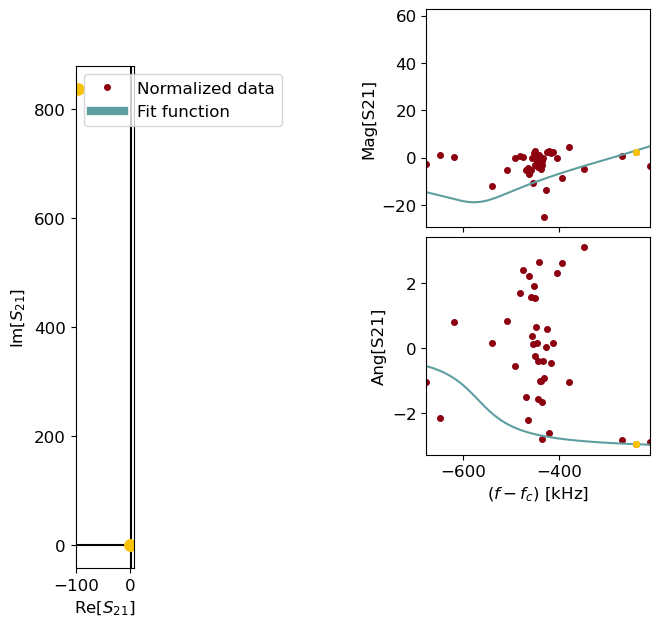

Less than 5 Data points to fit data, not enough points near resonance, attempting to fit anyway
Improper input: func input vector length N=3 must not exceed func output vector length M=2
>Failed to find confidence intervals for least squares fit
Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.600000 MHz, power -8 dBm to CSV
Averaging factor: 55.453
Pin -110.0, N photons: 1.09e+07, navg: 195
Next time: 0.81 min, q_adj: 0.185
Time elapsed: 1.43 min, expected time: 1.30 min


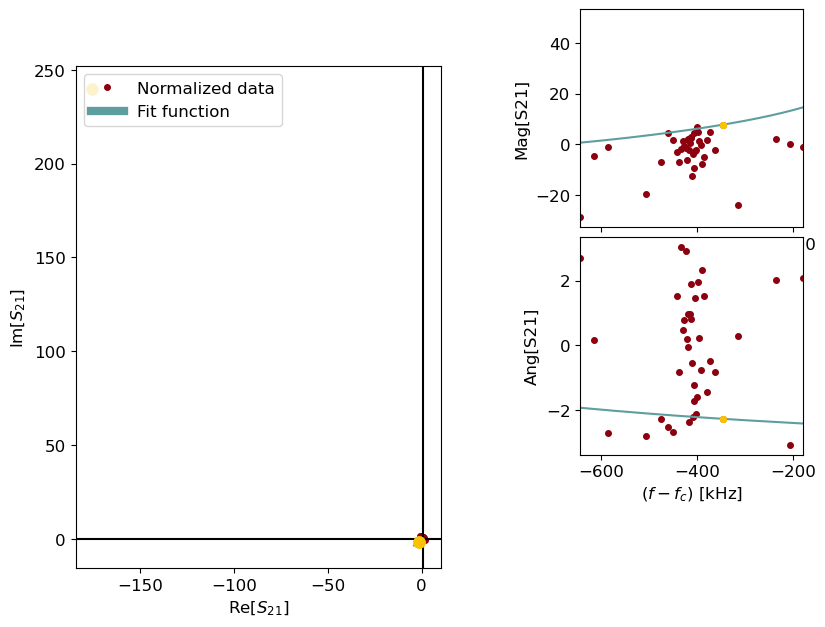

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.40841632326242394 < 1e-05 at iteration 4 and prob(Q=7159.693416313777) = 0.447549401174327 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=35798.46780739452) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=6904.183100372876) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=20712.549301118626) = 0.6491945163499998 < max(sigmas)
  warn(errmsg)


Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.271000 MHz, power -12 dBm to CSV
Averaging factor: 139.248
Pin -114.0, N photons: 2.86e+03, navg: 11777
Next time: 49.07 min, q_adj: 0.038
Time elapsed: 45.82 min, expected time: 49.07 min


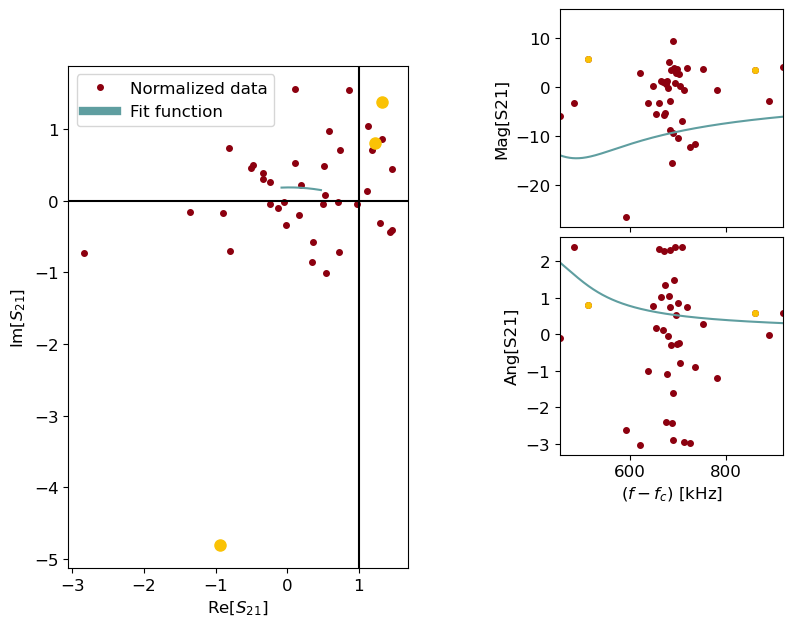

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=7337.458744753031) = 0.00019212274091662677 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=864.0045274876227) = 0.0 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=2592.013582462868) = 0.32212776210102545 < max(sigmas)
  warn(errmsg)


>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.266000 MHz, power -16 dBm to CSV
Averaging factor: 349.774
Pin -118.0, N photons: 381, navg: 1000
Next time: 4.17 min, q_adj: 0.205
Time elapsed: 4.03 min, expected time: 4.17 min


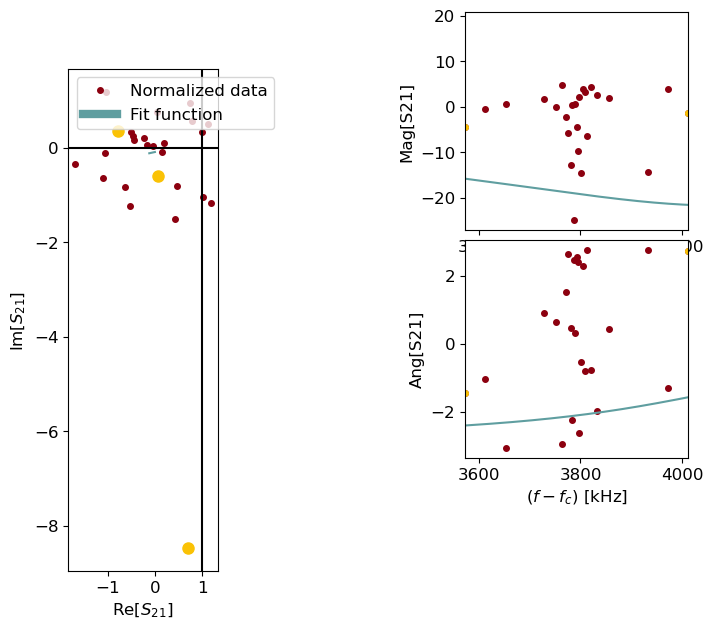

c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Q=493.34629964690765) = 0.37642002107291095 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:330: UserWarning: rel_change=-0.5138254803991124 < 1e-05 at iteration 4 and prob(Q=1966.8112117480407) = 0.226870286831401 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=256.33386085220127) = 0.4289245511505201 < max(sigmas)
  warn(errmsg)
c:\Users\slab\anaconda3\lib\site-packages\lmfit\confidence.py:317: UserWarning: Bound reached with prob(Qc=769.0015825566038) = 0.0 < max(sigmas)
  warn(errmsg)


Qi is less than zero. Please make sure data is of correct format: decibals (log10*20 version), and radians. Otherwise, it is quite likely that the resonator being fit is not a Notch type resonator. Other types of resonators will not work with this code.
>Error when trying to write parameters on plot
>cannot convert float infinity to integer
Saved fit results for frequency 7008.282000 MHz, power -20 dBm to CSV
Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Averaging factor: 878.606
Pin -122.0, N photons: 3.79, navg: 4751
Next time: 19.80 min, q_adj: 0.149
Error in do_vna_scan_consolidated (single_point): [Errno 2] Unable to create file (unable to open file: name = 'G:/My Drive/Projects/Materials/Data/250617-ResSilSQ2/power_sweep_20250618_070405\res_7008473130_-24dbm.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)


FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = 'G:/My Drive/Projects/Materials/Data/250617-ResSilSQ2/power_sweep_20250618_070405\res_7008473130_-24dbm.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

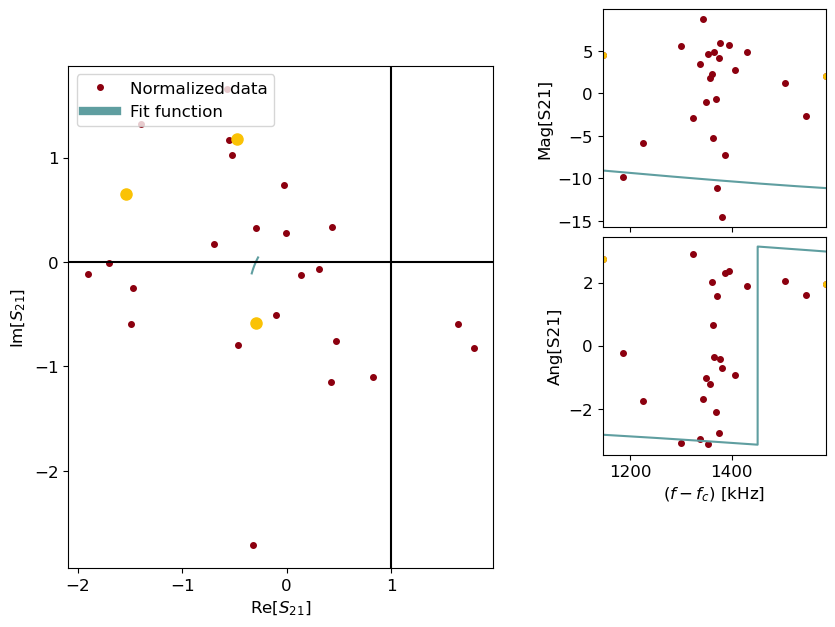

In [169]:
#freq_list = res_list[5:]
freq_list=res_list
#freq_list = [6004000869.385187]
att = 102#-25.57
nvals = 17
for i in range(1):
    custom_config = {"freqs":np.array(freq_list), 
                 "att":att,
                 'type':'single',#'single , lin',
                 'base_path':base_path, 
                 'bandwidth':100,
                 "db_slope":4,
                 'slope':slope,
                 "span_inc":7,
                 'nvals':nvals,
                 "pow_start":4,
                 "avg_corr":0.12,
                 'spar':spar,
                 'npoints':25, 
                 'pow_inc':-4, 
                 'comment':'with atten slow'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
    config = vna_measurement.get_default_power_sweep_config(custom_config)
    results = vna_measurement.power_sweep_v2(config, VNA)
    vna_measurement.write_hp_csv(results, config)


## Fast version

Comment saved to G:/My Drive/Projects/Materials/Data/250602-ResSil6TaSQ/power_sweep_20250603_143249\comment.txt


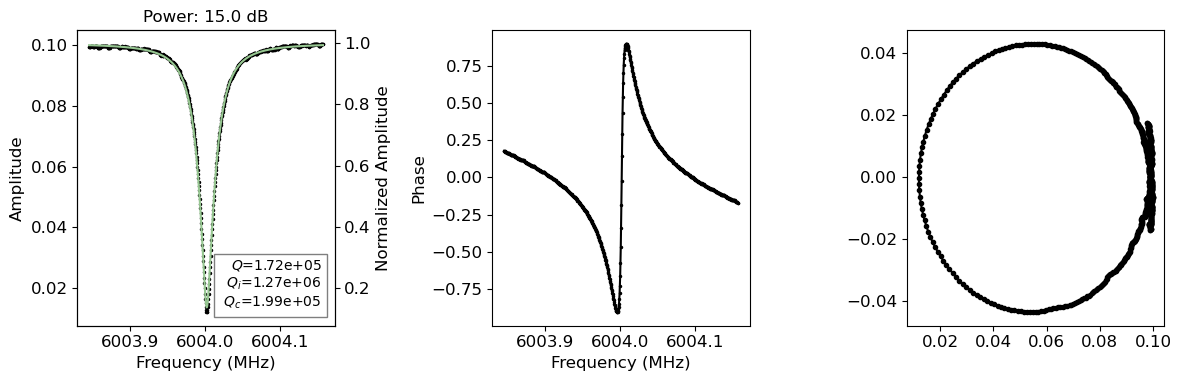

KeyboardInterrupt: 

In [42]:
freq_list = [6004000869.385187,
 6328492134.887255,
 6681207832.048611,
 7026329179.82658,
 7247004608.422264,
 7604966331.446795,
 8017990990.990991]

custom_config = {"freqs":np.array(freq_list), 
                "att":72,
                'type':'lin',#'single , lin',
                'base_path':base_path, 
                'bandwidth':100,
                "db_slope":5,
                'slope':slope,
                "span_inc":8,
                'nvals':8,
                "pow_start":15,
                "avg_corr":0.05,
                'spar':spar,
                'npoints':75, 
                'pow_inc':-4, 
                'comment':'125 mK'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
results = vna_measurement.power_sweep_v2(config, VNA)
vna_measurement.write_hp_csv(results)


In [29]:
vna_measurement.new_hp_csv(config['base_path'])

In [ ]:


qhp_list = []
for i in range(len(results.measurements)):
    q_int = [results.measurements[i][j].q_internal for j in range(len(results.measurements[i]))]
    qhp = np.max(q_int)
    qhp_list.append(qhp)

plt.figure(figsize=(8, 7))
plt.semilogy(qhp_list, 'o')
qhp_list
# Create an empty CSV file with headers if it doesn't exist
fname = os.path.join(config['base_path'], 'qhp.csv')
 # Adjust headers as needed
with open(fname, mode='a', newline='') as file:
    writer = csv.writer(file)
    now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    writer.writerow([now] + qhp_list)


## Power sweep just 1

In [ ]:
# 1
freq_list = [7029727828.725843,]

 # 1
#freq_list = [
# 6876720085.042521]
slope = -4.1534052061318027e-07 # 1 
#slope=0
#freq_list = [8045895572.786393]
# 2
#freq_list = [6727757253.626813, 6923469659.829915, 7034221985.992996, 8068307578.789394] # 2 
#freq_list = [8068307578.789394]
#slope = -4.6912118164934637e-07
#freq_list= [7034221985.992996]

# 3
# freq_list = [6015457003.501751,
#  6355251900.950475,
#  6712772761.38069,
#  #6859872161.080541,
#  7028836743.371686,
#  7163106428.2141075,
#  7543248049.024512,
#  8041999124.562282]
 # single, linear 
 # 001
custom_config = {"freqs":np.array(freq_list), 
                 "att":65,
                 'type':'lin',#'single , lin',
                 'base_path':base_path, 
                 'bandwidth':100,
                 "db_slope":7,
                 'slope':slope,
                 "span_inc":8,
                 'nvals':10,
                 "pow_start":10,
                 "avg_corr":0.1,
                 'spar':spar,
                 'npoints':100, 
                 'pow_inc':-4, 
                 'comment':'365 mK, 10 data points, warming'}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
print(config)
results = vna_measurement.power_sweep_v2(config, VNA)